In [5]:
!pip install lightgbm
!pip install catboost
!pip install shap
!pip install lime
!pip install missingno

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
import warnings
import pickle
from IPython.display import display, HTML

# For preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

# For models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# For explainability
import shap
import lime
from lime import lime_tabular

# For visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# For hypothesis testing
from scipy.stats import chi2_contingency, mannwhitneyu

In [7]:
# To hide warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('fivethirtyeight')
sns.set_palette('viridis')

# Custom color palette for consistency
custom_palette = sns.color_palette("viridis", 10)
attrition_colors = {'Yes': '#FF5A5F', 'No': '#2D7FF9'}

# Enable all plots to be displayed in the notebook
%matplotlib inline

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("Setup complete. Let's begin our analysis!")


Setup complete. Let's begin our analysis!


In [8]:
# Load the IBM HR Analytics Dataset
# Replace with your data path if different
df = pd.read_csv(r"C:\Users\Ammar\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")


In [9]:

# Display basic information
print(f"Dataset Shape: {df.shape}")
print(f"\nColumns in the dataset: {df.columns.tolist()}")

Dataset Shape: (1470, 35)

Columns in the dataset: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [10]:
# Check for missing values
print("\nMissing values check:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if any(missing_values > 0) else "No missing values found!")


Missing values check:
No missing values found!


In [11]:
# Display data types
print("\nData types:")
print(df.dtypes)


Data types:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWo

In [12]:
# Display first few rows
print("\nFirst 5 rows of the dataset:")
display(df.head())



First 5 rows of the dataset:


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [13]:
# Get basic statistics
print("\nBasic statistics for numerical columns:")
display(df.describe())


Basic statistics for numerical columns:


Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
count 1470.000   1470.000          1470.000   1470.000       1470.000   
mean    36.924    802.486             9.193      2.913          1.000   
std      9.135    403.509             8.107      1.024          0.000   
min     18.000    102.000             1.000      1.000          1.000   
25%     30.000    465.000             2.000      2.000          1.000   
50%     36.000    802.000             7.000      3.000          1.000   
75%     43.000   1157.000            14.000      4.000          1.000   
max     60.000   1499.000            29.000      5.000          1.000   

       EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
count        1470.000                 1470.000    1470.000        1470.000   
mean         1024.865                    2.722      65.891           2.730   
std           602.024                    1.093      20.329           0.712   
min             1.000                    1.000      30.000           1.000   
25%           491.250                    2.000      48.000           2.000   
50%          1020.500                    3.000      66.000           3.000   
75%          1555.750                    4.000      83.750           3.000   
max          2068.000                    4.000     100.000           4.000   

       JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
count  1470.000         1470.000       1470.000     1470.000   
mean      2.064            2.729       6502.931    14313.103   
std       1.107            1.103       4707.957     7117.786   
min       1.000            1.000       1009.000     2094.000   
25%       1.000            2.000       2911.000     8047.000   
50%       2.000            3.000       4919.000    14235.500   
75%       3.000            4.000       8379.000    20461.500   
max       5.000            4.000      19999.000    26999.000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count            1470.000           1470.000           1470.000   
mean                2.693             15.210              3.154   
std                 2.498              3.660              0.361   
min                 0.000             11.000              3.000   
25%                 1.000             12.000              3.000   
50%                 2.000             14.000              3.000   
75%                 4.000             18.000              3.000   
max                 9.000             25.000              4.000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count                  1470.000       1470.000          1470.000   
mean                      2.712         80.000             0.794   
std                       1.081          0.000             0.852   
min                       1.000         80.000             0.000   
25%                       2.000         80.000             0.000   
50%                       3.000         80.000             1.000   
75%                       4.000         80.000             1.000   
max                       4.000         80.000             3.000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count           1470.000               1470.000         1470.000   
mean              11.280                  2.799            2.761   
std                7.781                  1.289            0.706   
min                0.000                  0.000            1.000   
25%                6.000                  2.000            2.000   
50%               10.000                  3.000            3.000   
75%               15.000                  3.000            3.000   
max               40.000                  6.000            4.000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count        1470.000            1470.000                 1470.000   
mean            7.008               4.229                    2.188   
std             6.127            

In [14]:
# Check the target variable distribution
print("\nAttrition distribution:")
attrition_counts = df['Attrition'].value_counts()
print(attrition_counts)
print(f"Attrition Rate: {attrition_counts['Yes'] / len(df) * 100:.2f}%")


Attrition distribution:
Attrition
No     1233
Yes     237
Name: count, dtype: int64
Attrition Rate: 16.12%


In [15]:
# Create a function to plot the target distribution
def plot_attrition_distribution():
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x='Attrition', data=df, palette=attrition_colors)
    
    # Add percentage and count labels
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 3,
                f'{height}\n({height/total*100:.1f}%)',
                ha="center", fontsize=12)
    
    plt.title('Distribution of Employee Attrition', fontsize=16)
    plt.xlabel('Attrition', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.tight_layout()
    plt.show()


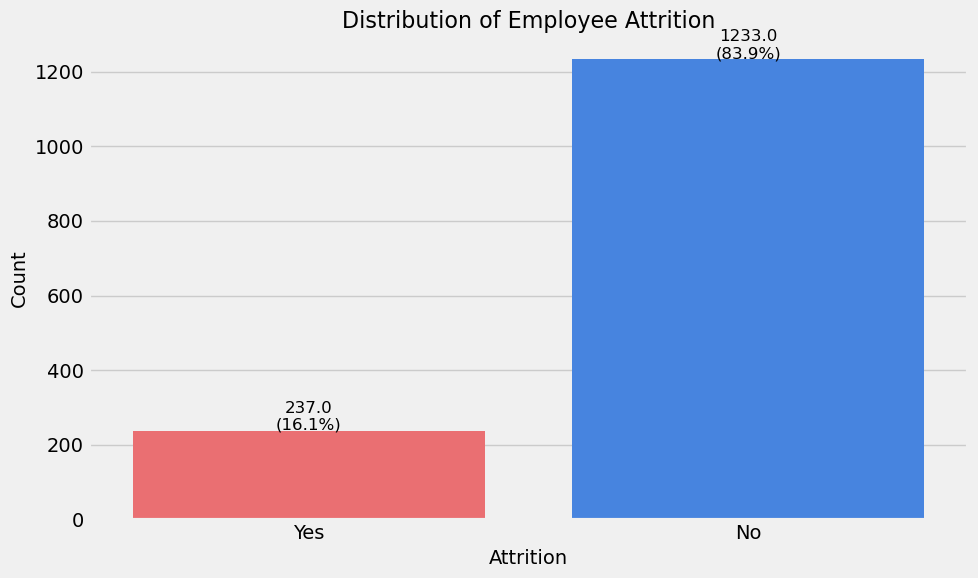

In [16]:
# Plot attrition distribution
plot_attrition_distribution()

In [17]:
# -----------------------------------------------------------------------
# 2. EXPLORATORY DATA ANALYSIS (EDA)
# -----------------------------------------------------------------------

# Define numerical and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()


In [18]:
# Remove target variable from features
if 'Attrition' in numerical_features:
    numerical_features.remove('Attrition')
if 'Attrition' in categorical_features:
    categorical_features.remove('Attrition')

In [19]:

# Remove EmployeeNumber, EmployeeCount, and StandardHours (usually not predictive)
numerical_features = [col for col in numerical_features if col not in ['EmployeeNumber', 'EmployeeCount', 'StandardHours']]

print(f"Numerical Features: {len(numerical_features)}")
print(f"Categorical Features: {len(categorical_features)}")


Numerical Features: 23
Categorical Features: 8


In [23]:
# Function to check for outliers in numerical features
def analyze_outliers(df, numerical_features):
    outlier_stats = {}
    plt.figure(figsize=(15, 10))
    
    for i, feature in enumerate(numerical_features[:9], 1):  # Display 9 boxplots at a time
        plt.subplot(3, 3, i)
        sns.boxplot(x='Attrition', y=feature, data=df, palette=attrition_colors)
        plt.title(f'{feature} by Attrition')
        
        # Calculate IQR for outlier detection
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        outlier_lower = Q1 - 1.5 * IQR
        outlier_upper = Q3 + 1.5 * IQR
        outliers = df[(df[feature] < outlier_lower) | (df[feature] > outlier_upper)]
        
        outlier_stats[feature] = {
            'Q1': Q1, 'Q3': Q3, 'IQR': IQR,
            'Lower Bound': outlier_lower, 'Upper Bound': outlier_upper,
            'Outlier Count': len(outliers),
            'Outlier Percentage': len(outliers) / len(df) * 100
        }
    
    plt.tight_layout()
    plt.show()
    
    if len(numerical_features) > 9:
        plt.figure(figsize=(15, 10))
        for i, feature in enumerate(numerical_features[9:18], 1):
            plt.subplot(3, 3, i)
            sns.boxplot(x='Attrition', y=feature, data=df, palette=attrition_colors)
            plt.title(f'{feature} by Attrition')
            
            # Calculate IQR for outlier detection
            Q1 = df[feature].quantile(0.25)
            Q3 = df[feature].quantile(0.75)
            IQR = Q3 - Q1
            outlier_lower = Q1 - 1.5 * IQR
            outlier_upper = Q3 + 1.5 * IQR
            outliers = df[(df[feature] < outlier_lower) | (df[feature] > outlier_upper)]
            
            outlier_stats[feature] = {
                'Q1': Q1, 'Q3': Q3, 'IQR': IQR,
                'Lower Bound': outlier_lower, 'Upper Bound': outlier_upper,
                'Outlier Count': len(outliers),
                'Outlier Percentage': len(outliers) / len(df) * 100
            }
        
        plt.tight_layout()
        plt.show()
    
    return outlier_stats

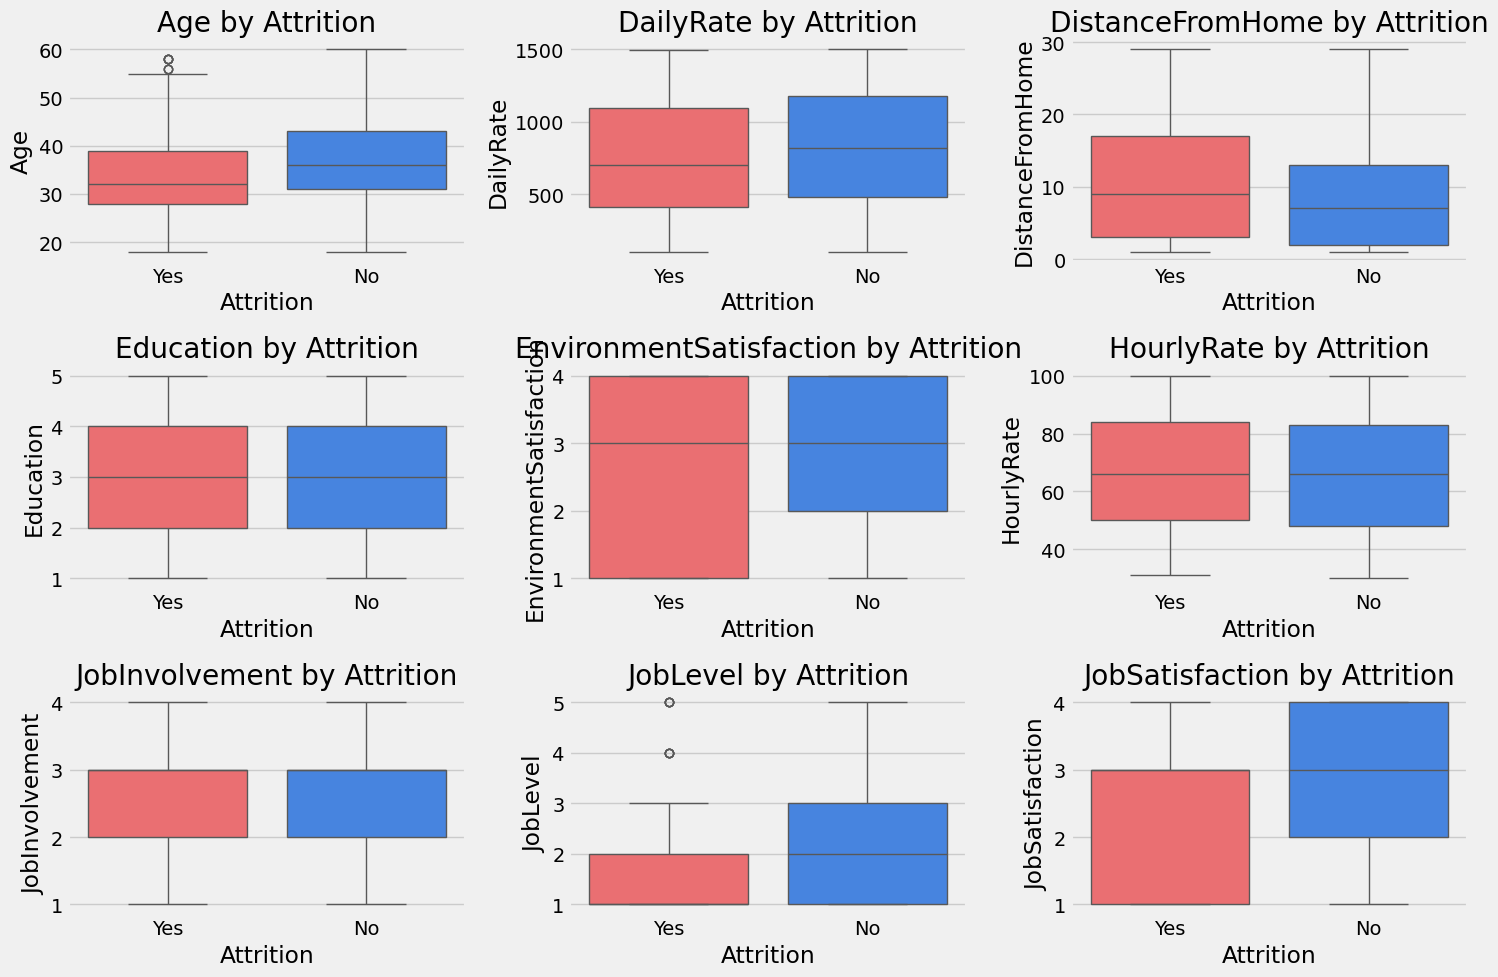

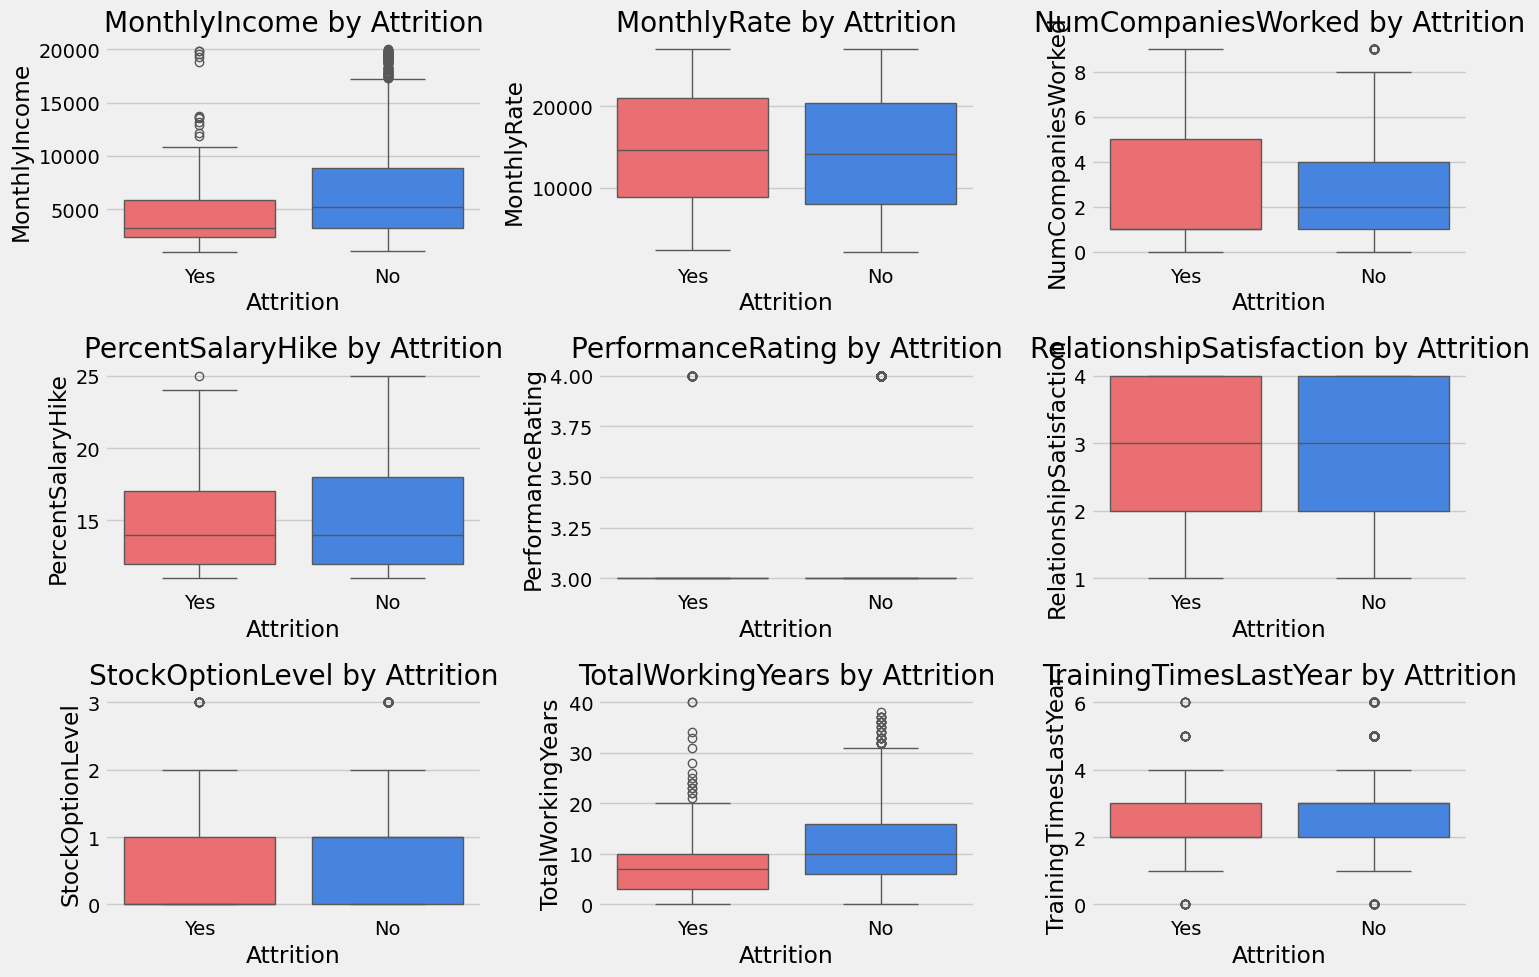


Features with significant outliers (>5%):
MonthlyIncome: 114 outliers (7.76%)
PerformanceRating: 226 outliers (15.37%)
StockOptionLevel: 85 outliers (5.78%)
TrainingTimesLastYear: 238 outliers (16.19%)


In [21]:
# Check for outliers
outlier_stats = analyze_outliers(df, numerical_features)

# Display features with significant outliers
significant_outliers = {k: v for k, v in outlier_stats.items() if v['Outlier Percentage'] > 5}
if significant_outliers:
    print("\nFeatures with significant outliers (>5%):")
    for feature, stats in significant_outliers.items():
        print(f"{feature}: {stats['Outlier Count']} outliers ({stats['Outlier Percentage']:.2f}%)")


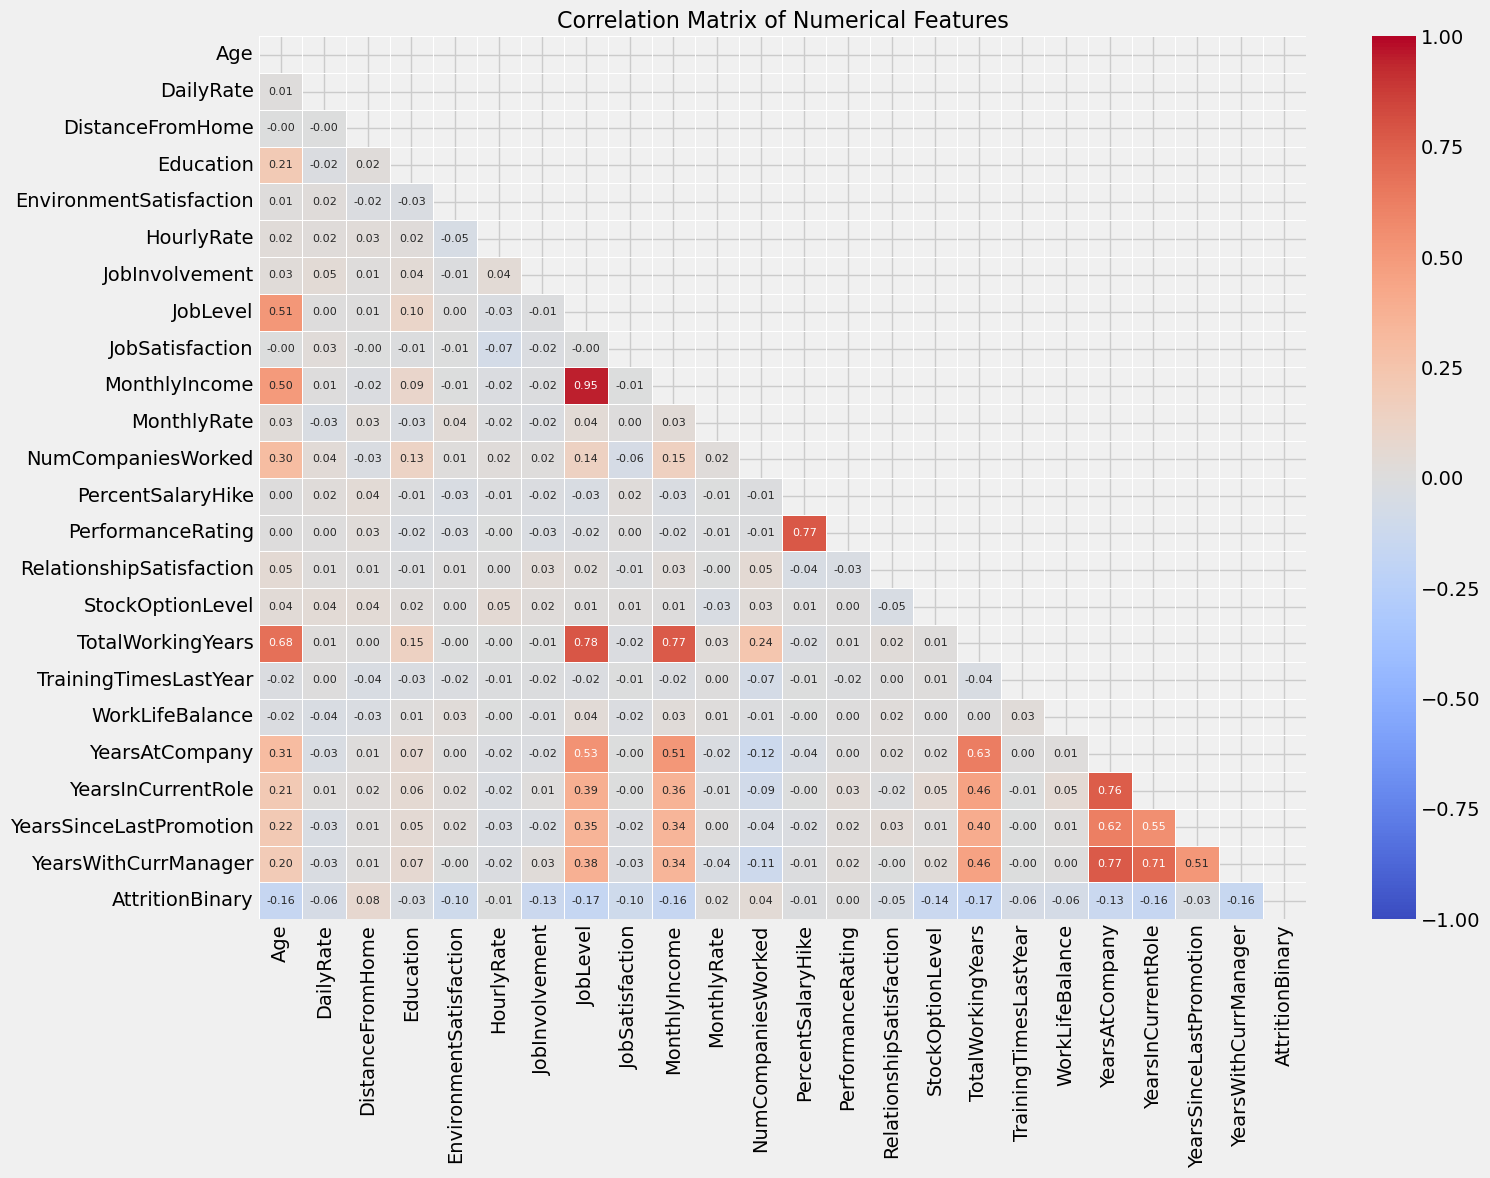

In [22]:
# 2.1 Correlation Analysis
# Let's examine correlation between numerical features and their relationship with attrition

# Create a binary target variable for correlation analysis
df['AttritionBinary'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Calculate correlation matrix
correlation_matrix = df[numerical_features + ['AttritionBinary']].corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            mask=mask, vmin=-1, vmax=1, annot_kws={"size": 8}, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

In [24]:
# Identify features highly correlated with Attrition
attrition_corr = correlation_matrix['AttritionBinary'].sort_values(ascending=False)
print("\nFeatures most correlated with Attrition:")
print(attrition_corr[1:6])  # Top 5 positive correlations
print("\nFeatures most negatively correlated with Attrition:")
print(attrition_corr[-5:])  # Top 5 negative correlations


Features most correlated with Attrition:
DistanceFromHome      0.078
NumCompaniesWorked    0.043
MonthlyRate           0.015
PerformanceRating     0.003
HourlyRate           -0.007
Name: AttritionBinary, dtype: float64

Features most negatively correlated with Attrition:
Age                  -0.159
MonthlyIncome        -0.160
YearsInCurrentRole   -0.161
JobLevel             -0.169
TotalWorkingYears    -0.171
Name: AttritionBinary, dtype: float64


In [27]:
# 2.2 Categorical Features Analysis

# Function to analyze categorical features
def analyze_categorical_features(df, categorical_features):
    plt.figure(figsize=(18, 15))
    rows = (len(categorical_features) + 2) // 3  # Ensure we have enough rows
    
    for i, feature in enumerate(categorical_features, 1):
        plt.subplot(rows, 3, i)
        
        # Get value counts by attrition
        value_counts = df.groupby(['Attrition', feature]).size().unstack(0)
        
        # Calculate percentages
        value_percentages = value_counts.div(value_counts.sum(axis=1), axis=0) * 100
        
        # Plot as a stacked bar
        value_percentages.plot(kind='bar', stacked=True, ax=plt.gca(), color=[attrition_colors['Yes'], attrition_colors['No']])
        
        plt.title(f'Attrition by {feature}', fontsize=12)
        plt.xlabel(feature, fontsize=10)
        plt.ylabel('Percentage', fontsize=10)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Attrition')
    
    plt.tight_layout()
    plt.show()
     # Perform chi-square test for categorical features
    chi_square_results = {}
    for feature in categorical_features:
        contingency_table = pd.crosstab(df[feature], df['Attrition'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi_square_results[feature] = {
            'chi2': chi2,
            'p-value': p,
            'degrees_of_freedom': dof
        }
    
    # Sort by p-value to identify most significant associations
    sorted_chi_square = {k: v for k, v in sorted(chi_square_results.items(), key=lambda item: item[1]['p-value'])}
    
    return sorted_chi_square

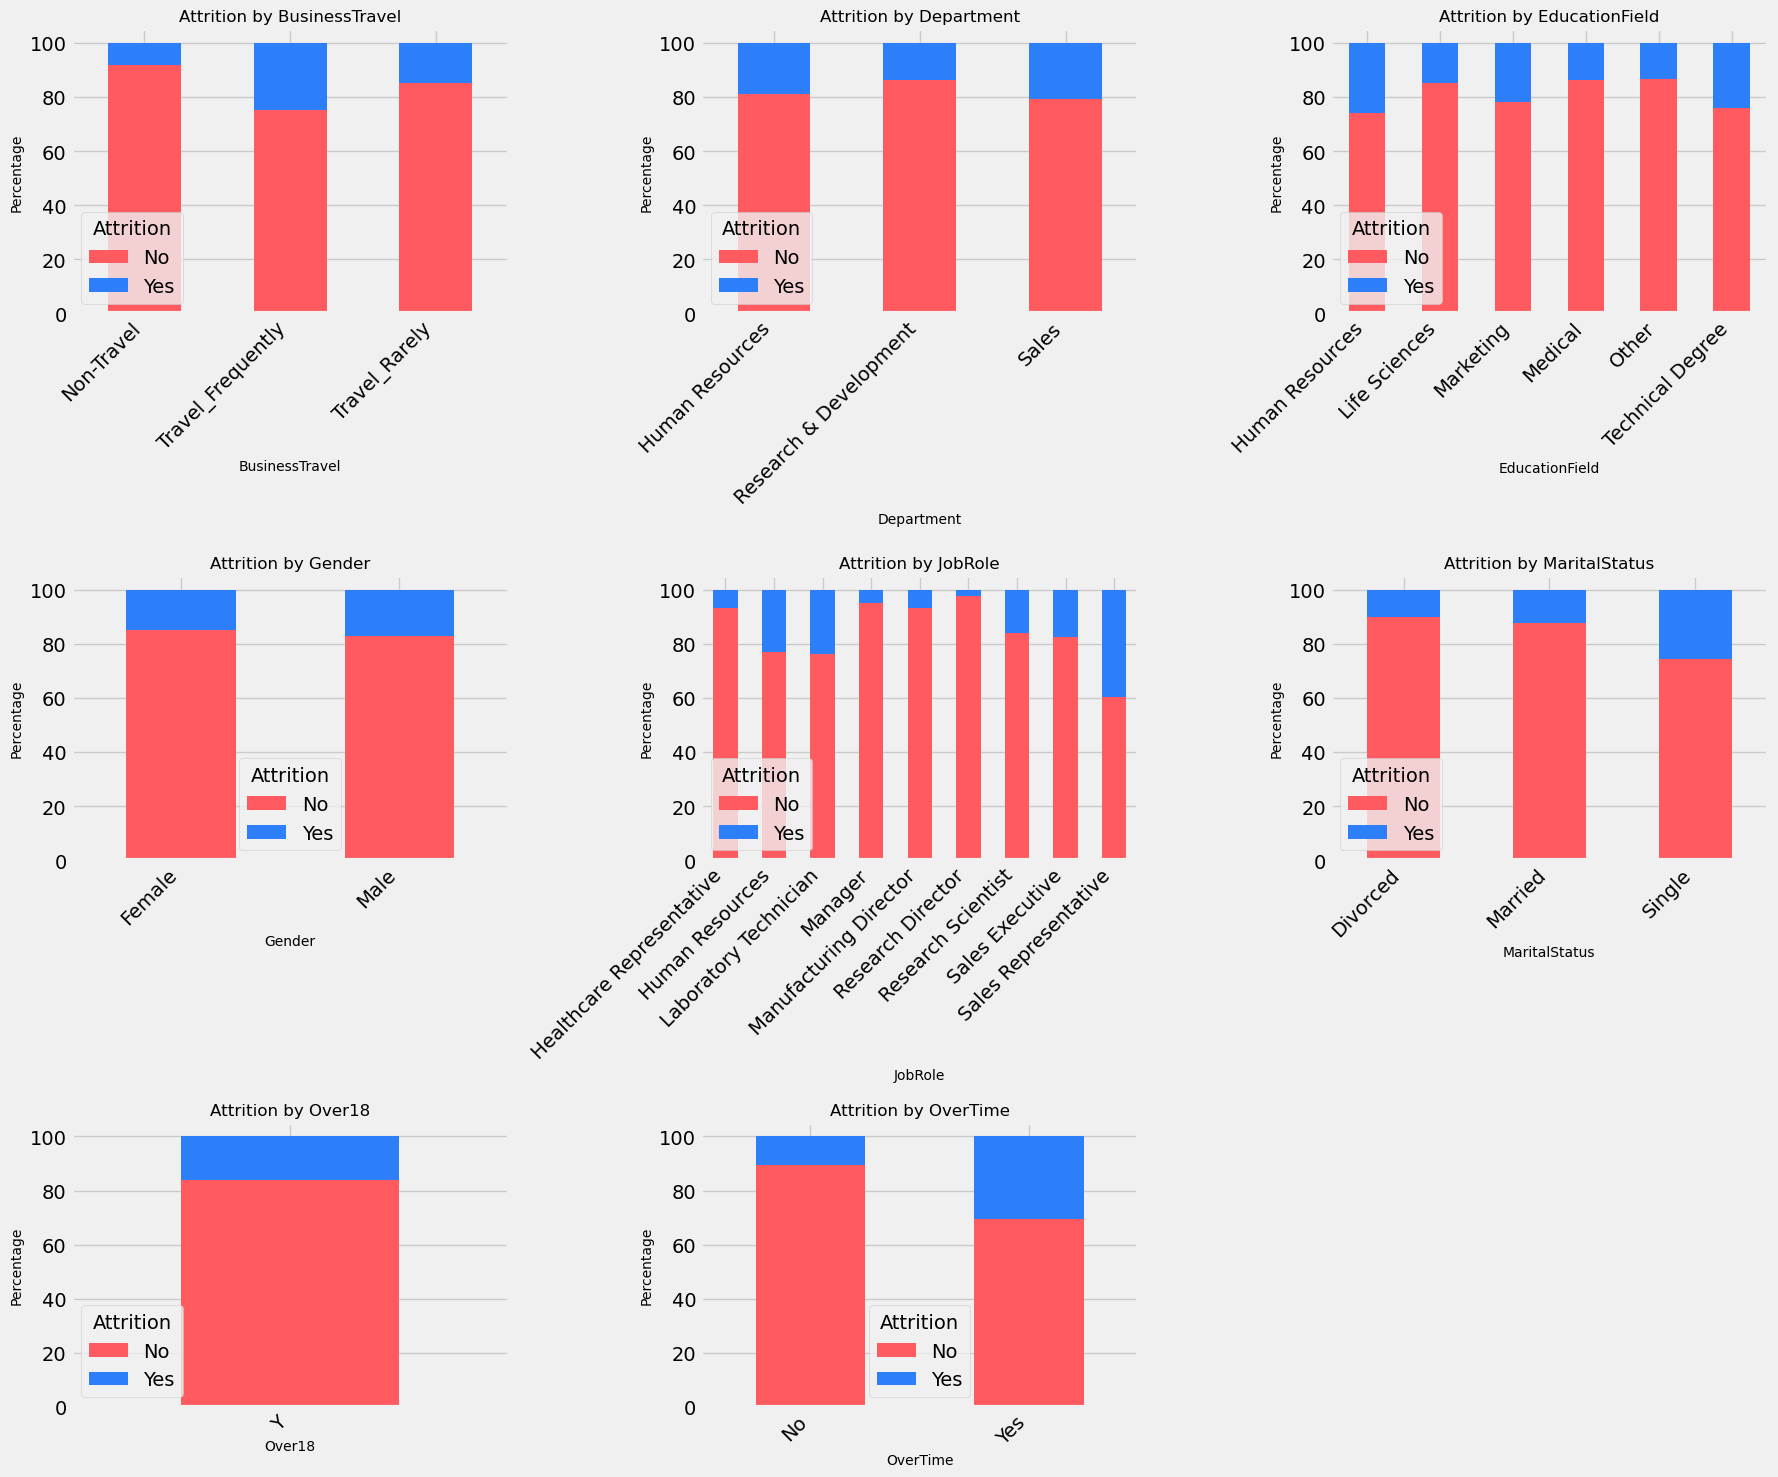


Statistically significant categorical features (p < 0.05):
OverTime: Chi2 = 87.56, p-value = 0.0000
JobRole: Chi2 = 86.19, p-value = 0.0000
MaritalStatus: Chi2 = 46.16, p-value = 0.0000
BusinessTravel: Chi2 = 24.18, p-value = 0.0000
Department: Chi2 = 10.80, p-value = 0.0045
EducationField: Chi2 = 16.02, p-value = 0.0068


In [28]:
# Analyze categorical features
chi_square_results = analyze_categorical_features(df, categorical_features)

# Print significant categorical associations
print("\nStatistically significant categorical features (p < 0.05):")
for feature, stats in chi_square_results.items():
    if stats['p-value'] < 0.05:
        print(f"{feature}: Chi2 = {stats['chi2']:.2f}, p-value = {stats['p-value']:.4f}")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

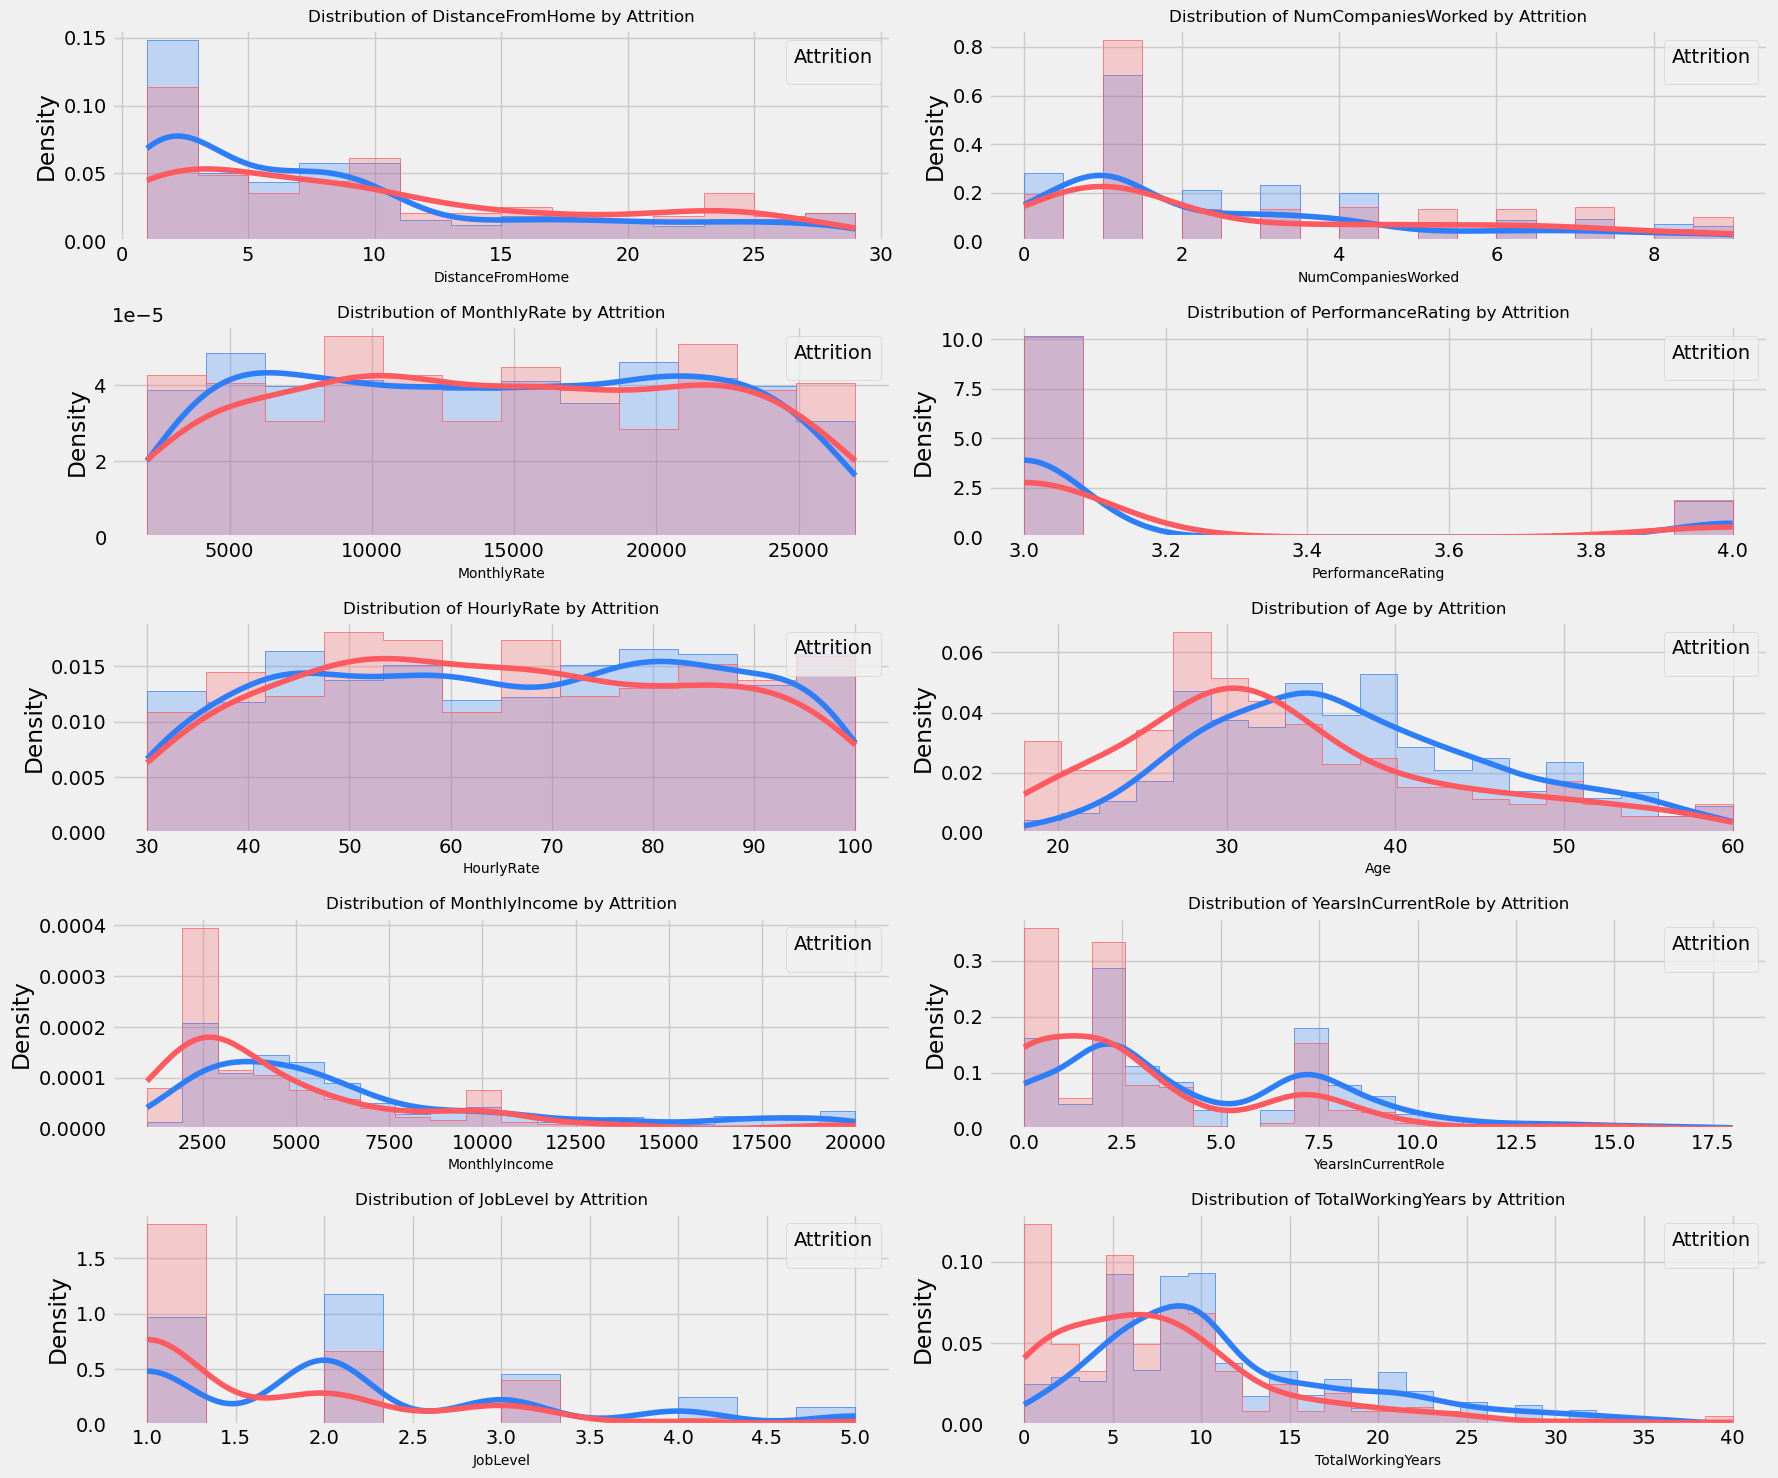

In [29]:
# 2.3 Feature Distribution by Attrition
# Let's examine the distribution of the top numerical features by attrition status

# Get top numerical features based on correlation with attrition
top_numerical_features = attrition_corr[1:].index[:5].tolist() + attrition_corr[-5:].index.tolist()

# Plot histograms for top numerical features by attrition
plt.figure(figsize=(18, 15))
for i, feature in enumerate(top_numerical_features, 1):
    plt.subplot(5, 2, i)
    sns.histplot(data=df, x=feature, hue='Attrition', kde=True, palette=attrition_colors, 
                 element='step', common_norm=False, stat='density')
    plt.title(f'Distribution of {feature} by Attrition', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.legend(title='Attrition')

plt.tight_layout()
plt.show()


In [30]:
# 2.4 Age and Tenure Analysis
# Let's specifically analyze age and service time dimensions

plt.figure(figsize=(18, 6))


<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

Text(0.5, 1.0, 'Age by Attrition Status')

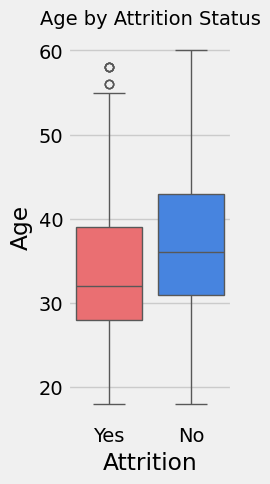

In [31]:
# Plot Age distribution by attrition
plt.subplot(1, 3, 1)
sns.boxplot(x='Attrition', y='Age', data=df, palette=attrition_colors)
plt.title('Age by Attrition Status', fontsize=14)

Text(0.5, 1.0, 'Years at Company by Attrition Status')

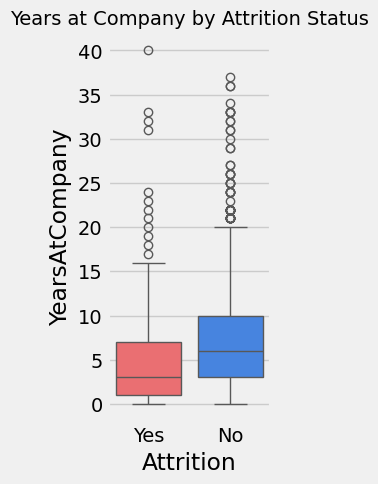

In [32]:

# Plot Years at Company distribution by attrition
plt.subplot(1, 3, 2)
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df, palette=attrition_colors)
plt.title('Years at Company by Attrition Status', fontsize=14)

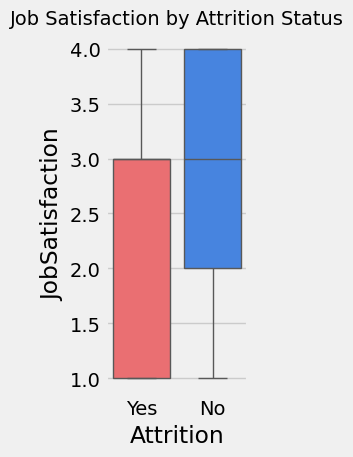

In [33]:

# Plot Job Satisfaction distribution by attrition
plt.subplot(1, 3, 3)
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df, palette=attrition_colors)
plt.title('Job Satisfaction by Attrition Status', fontsize=14)

plt.tight_layout()
plt.show()


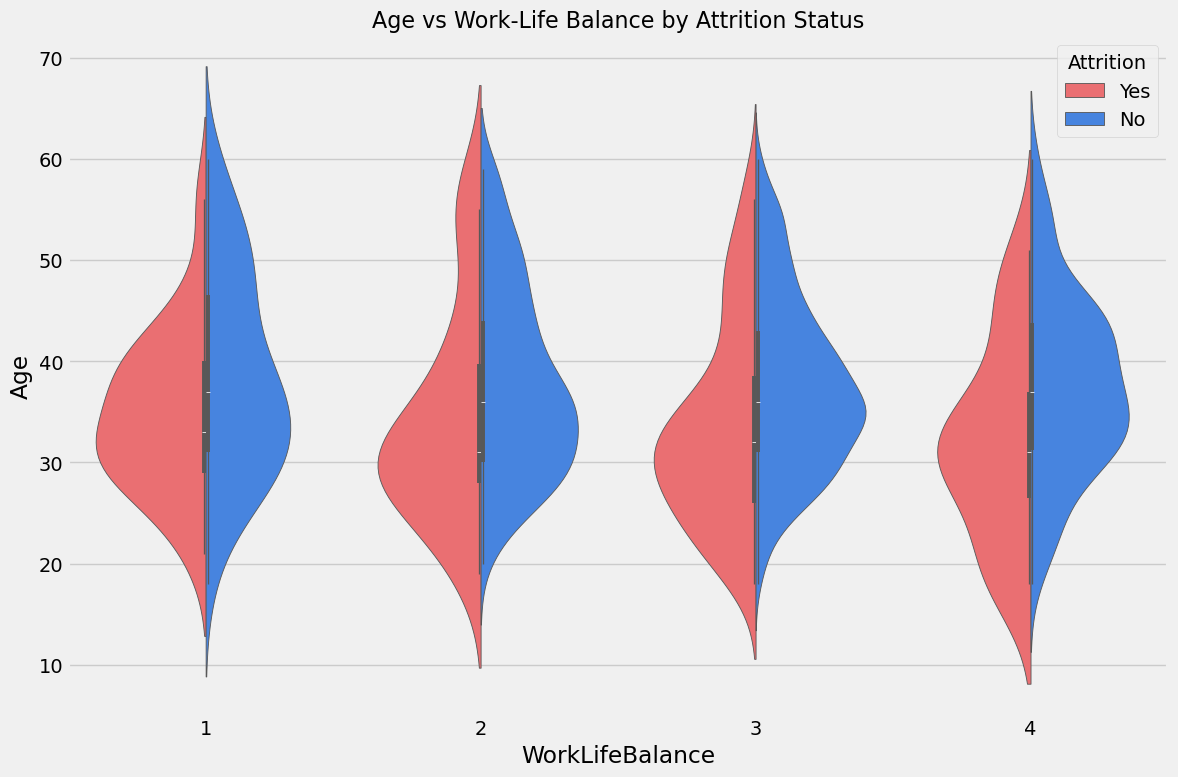

In [34]:
# 2.5 Work-Life Balance Analysis
# Age vs Work-Life Balance vs Attrition

plt.figure(figsize=(12, 8))
sns.violinplot(x='WorkLifeBalance', y='Age', hue='Attrition', data=df, palette=attrition_colors, split=True)
plt.title('Age vs Work-Life Balance by Attrition Status', fontsize=16)
plt.tight_layout()
plt.show()

In [35]:
# 2.6 Statistical Tests for Numerical Features
# Perform Mann-Whitney U test to identify significant differences between attrition groups

mann_whitney_results = {}
for feature in numerical_features:
    yes_group = df[df['Attrition'] == 'Yes'][feature]
    no_group = df[df['Attrition'] == 'No'][feature]
    
    stat, p = mannwhitneyu(yes_group, no_group)
    mann_whitney_results[feature] = {
        'U-statistic': stat,
        'p-value': p
    }


In [36]:
# Sort by p-value and display significant features
sorted_mann_whitney = {k: v for k, v in sorted(mann_whitney_results.items(), key=lambda item: item[1]['p-value'])}

print("\nStatistically significant numerical features (p < 0.05):")
significant_num_features = []
for feature, stats in sorted_mann_whitney.items():
    if stats['p-value'] < 0.05:
        print(f"{feature}: U = {stats['U-statistic']:.2f}, p-value = {stats['p-value']:.4f}")
        significant_num_features.append(feature)


Statistically significant numerical features (p < 0.05):
TotalWorkingYears: U = 100567.00, p-value = 0.0000
MonthlyIncome: U = 100620.50, p-value = 0.0000
YearsAtCompany: U = 102582.00, p-value = 0.0000
JobLevel: U = 104729.50, p-value = 0.0000
YearsInCurrentRole: U = 105214.00, p-value = 0.0000
YearsWithCurrManager: U = 106361.50, p-value = 0.0000
StockOptionLevel: U = 109611.00, p-value = 0.0000
Age: U = 106859.00, p-value = 0.0000
JobInvolvement: U = 121957.00, p-value = 0.0000
JobSatisfaction: U = 123362.50, p-value = 0.0001
EnvironmentSatisfaction: U = 124787.00, p-value = 0.0002
DistanceFromHome: U = 164225.50, p-value = 0.0024
DailyRate: U = 133042.00, p-value = 0.0290
YearsSinceLastPromotion: U = 134374.00, p-value = 0.0412
WorkLifeBalance: U = 135709.50, p-value = 0.0465
TrainingTimesLastYear: U = 134785.50, p-value = 0.0473


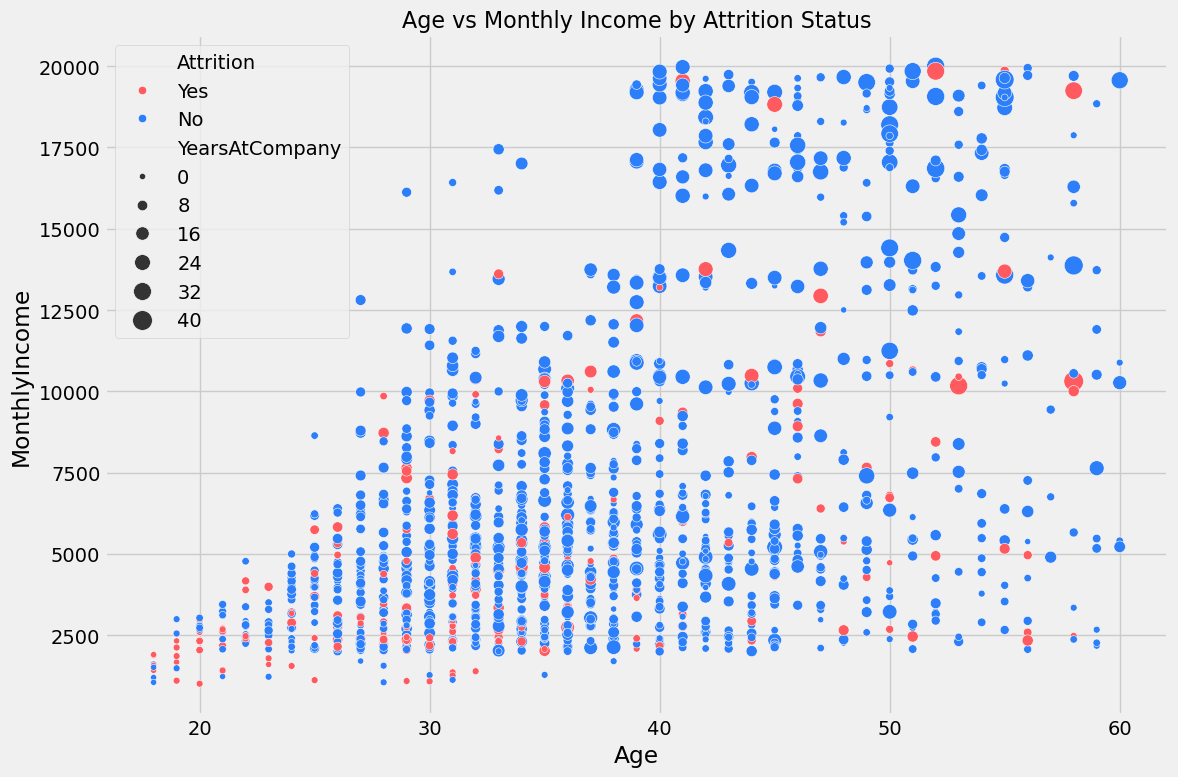

In [37]:
# 2.7 Multivariate Analysis
# Let's look at some interesting feature combinations

# Age vs Monthly Income vs Attrition
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df, x='Age', y='MonthlyIncome', hue='Attrition', 
                         palette=attrition_colors, size='YearsAtCompany', sizes=(20, 200))
plt.title('Age vs Monthly Income by Attrition Status', fontsize=16)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

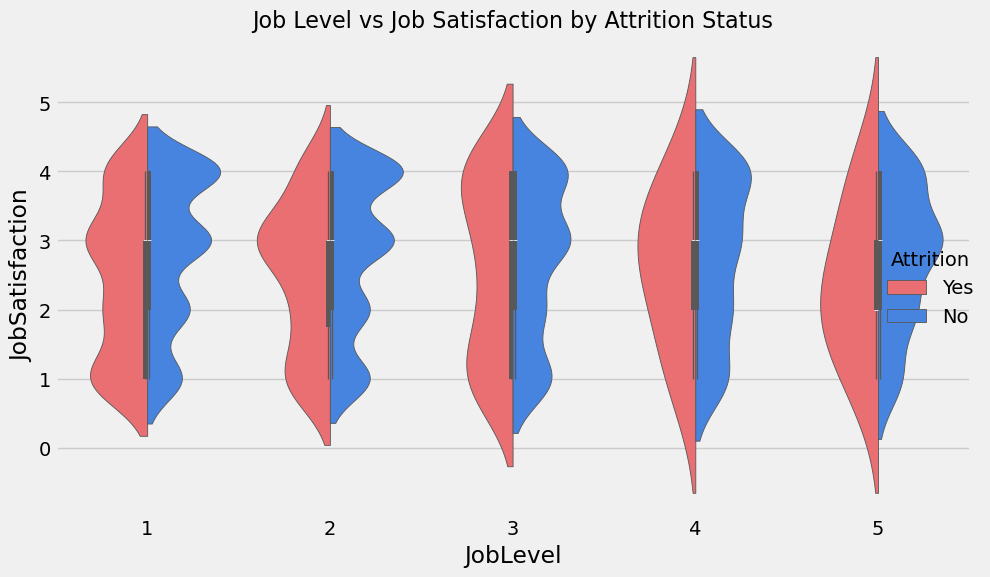

In [38]:
# Job Level vs Job Satisfaction vs Attrition
plt.figure(figsize=(14, 8))
sns.catplot(data=df, x='JobLevel', y='JobSatisfaction', hue='Attrition', 
           kind='violin', split=True, palette=attrition_colors, height=6, aspect=1.5)
plt.title('Job Level vs Job Satisfaction by Attrition Status', fontsize=16)
plt.tight_layout()
plt.show()

In [39]:

# 2.8 Relationship Satisfaction Analysis
# Analyze the impact of relationship satisfaction on attrition

plt.figure(figsize=(16, 6))


<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

Text(0.5, 1.0, 'Relationship Satisfaction by Attrition')

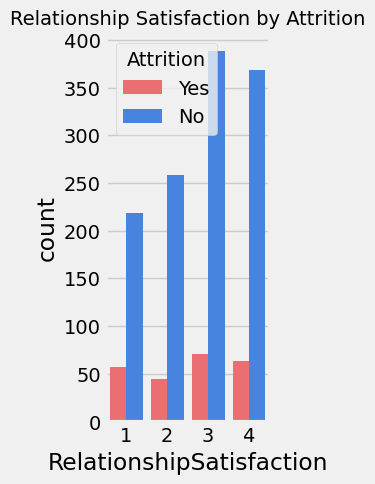

In [40]:
# Plot Relationship Satisfaction by attrition
plt.subplot(1, 3, 1)
sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=df, palette=attrition_colors)
plt.title('Relationship Satisfaction by Attrition', fontsize=14)

Text(0.5, 1.0, 'Environment Satisfaction by Attrition')

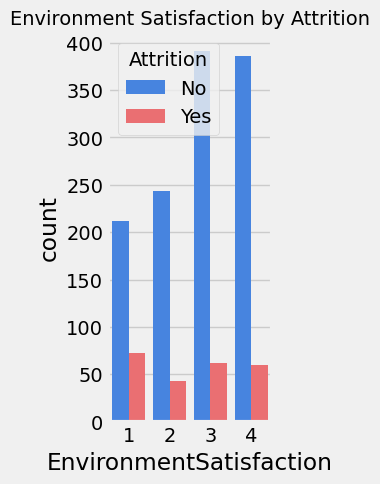

In [41]:
# Plot Environment Satisfaction by attrition
plt.subplot(1, 3, 2)
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df, palette=attrition_colors)
plt.title('Environment Satisfaction by Attrition', fontsize=14)


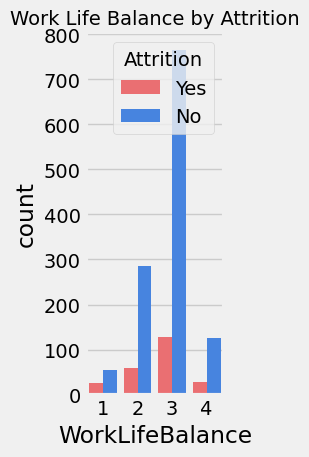

In [42]:
# Plot Work Life Balance by attrition
plt.subplot(1, 3, 3)
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, palette=attrition_colors)
plt.title('Work Life Balance by Attrition', fontsize=14)

plt.tight_layout()
plt.show()

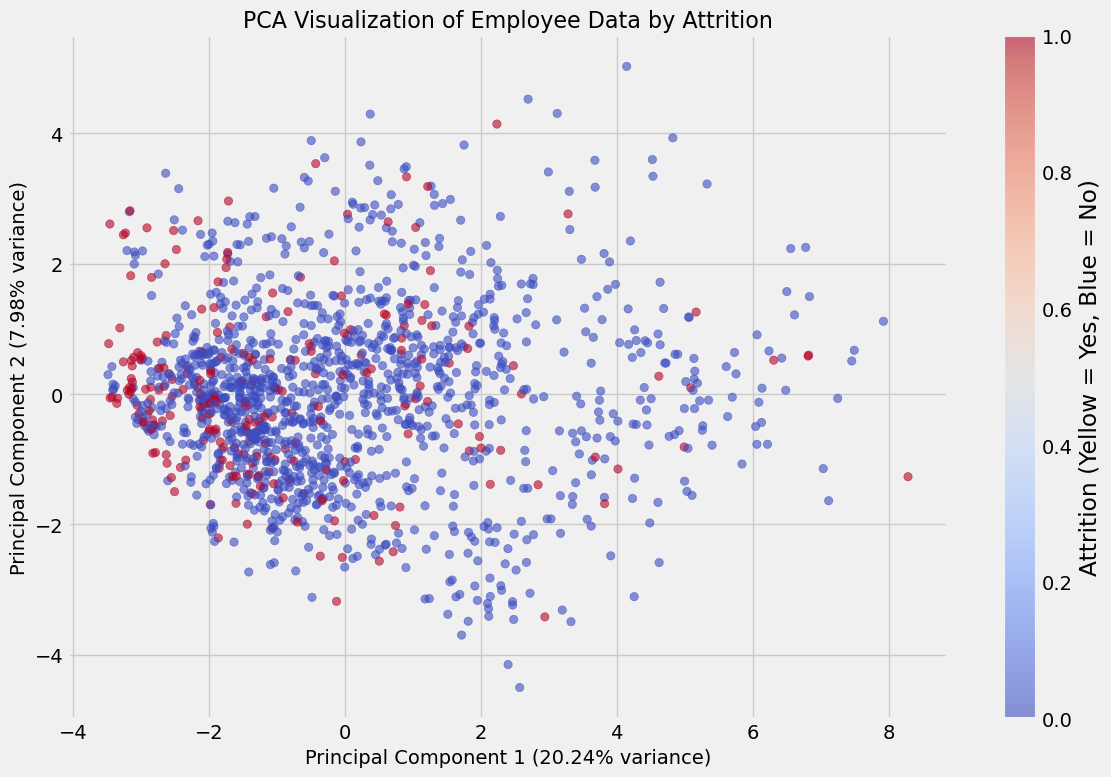

Total variance explained by 2 principal components: 28.23%


In [43]:

# 2.9 Advanced visualization using PCA to reduce dimensionality
# This helps visualize high-dimensional data in 2D

# Prepare data for PCA
X_numeric = df[numerical_features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Create PCA visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], 
                     c=[1 if a == 'Yes' else 0 for a in df['Attrition']], 
                     cmap='coolwarm', alpha=0.6)
plt.title('PCA Visualization of Employee Data by Attrition', fontsize=16)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=14)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=14)
plt.colorbar(label='Attrition (Yellow = Yes, Blue = No)')
plt.tight_layout()
plt.show()

print(f"Total variance explained by 2 principal components: {sum(pca.explained_variance_ratio_):.2%}")

In [44]:

# Identify key features contributing to principal components
feature_importance = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(2)],
    index=numerical_features
)

print("\nTop 5 features contributing to PC1:")
print(feature_importance['PC1'].abs().sort_values(ascending=False).head(5))

print("\nTop 5 features contributing to PC2:")
print(feature_importance['PC2'].abs().sort_values(ascending=False).head(5))



Top 5 features contributing to PC1:
TotalWorkingYears    0.403
YearsAtCompany       0.392
JobLevel             0.383
MonthlyIncome        0.375
YearsInCurrentRole   0.336
Name: PC1, dtype: float64

Top 5 features contributing to PC2:
PerformanceRating    0.443
PercentSalaryHike    0.424
NumCompaniesWorked   0.379
Age                  0.283
YearsInCurrentRole   0.282
Name: PC2, dtype: float64


In [45]:
# 2.10 Summary of EDA Findings
print("\n--- EDA SUMMARY ---")
print("\nKey findings from Exploratory Data Analysis:")

print("\n1. Target Variable:")
print(f"   - Attrition rate is {attrition_counts['Yes'] / len(df) * 100:.2f}% (imbalanced dataset)")

print("\n2. Most significant numerical features associated with attrition:")
for feature in significant_num_features[:5]:
    yes_mean = df[df['Attrition'] == 'Yes'][feature].mean()
    no_mean = df[df['Attrition'] == 'No'][feature].mean()
    print(f"   - {feature}: Avg for attrition = {yes_mean:.2f}, Avg for non-attrition = {no_mean:.2f}")

print("\n3. Most significant categorical features associated with attrition:")
sig_cat_features = [f for f, stats in chi_square_results.items() if stats['p-value'] < 0.05]
for feature in sig_cat_features[:5]:
    print(f"   - {feature} (p-value: {chi_square_results[feature]['p-value']:.4f})")

print("\n4. Key insights:")
print("   - Younger employees and those with fewer years at company are more likely to leave")
print("   - Lower job satisfaction and work-life balance are associated with higher attrition")
print("   - Job level and monthly income show negative correlation with attrition")
print("   - Overtime is strongly associated with higher attrition rates")
print("   - Single employees show higher attrition compared to married employees")



--- EDA SUMMARY ---

Key findings from Exploratory Data Analysis:

1. Target Variable:
   - Attrition rate is 16.12% (imbalanced dataset)

2. Most significant numerical features associated with attrition:
   - TotalWorkingYears: Avg for attrition = 8.24, Avg for non-attrition = 11.86
   - MonthlyIncome: Avg for attrition = 4787.09, Avg for non-attrition = 6832.74
   - YearsAtCompany: Avg for attrition = 5.13, Avg for non-attrition = 7.37
   - JobLevel: Avg for attrition = 1.64, Avg for non-attrition = 2.15
   - YearsInCurrentRole: Avg for attrition = 2.90, Avg for non-attrition = 4.48

3. Most significant categorical features associated with attrition:
   - OverTime (p-value: 0.0000)
   - JobRole (p-value: 0.0000)
   - MaritalStatus (p-value: 0.0000)
   - BusinessTravel (p-value: 0.0000)
   - Department (p-value: 0.0045)

4. Key insights:
   - Younger employees and those with fewer years at company are more likely to leave
   - Lower job satisfaction and work-life balance are associat

In [47]:
# -----------------------------------------------------------------------
# 3. FEATURE ENGINEERING AND PREPROCESSING
# -----------------------------------------------------------------------

print("\n--- FEATURE ENGINEERING ---")

# 3.1 Create new features
print("Creating new features based on EDA insights...")

# Income-related features
df['SalaryHikePercentage'] = df['PercentSalaryHike'] / 100
df['YearlySalary'] = df['MonthlyIncome'] * 12
df['IncomeToJobLevelRatio'] = df['MonthlyIncome'] / df['JobLevel'].map(lambda x: max(x, 1))
df['IncomeToAge'] = df['MonthlyIncome'] / df['Age']
df['SalaryPerExperience'] = df['MonthlyIncome'] / df['TotalWorkingYears'].map(lambda x: max(x, 1))

# Satisfaction composite scores
df['OverallSatisfaction'] = (df['JobSatisfaction'] + df['EnvironmentSatisfaction'] + 
                             df['WorkLifeBalance'] + df['RelationshipSatisfaction']) / 4

# Work-life balance related
df['WorkLifeIndex'] = df['WorkLifeBalance'] * (5 - df['OverTime'].map({'Yes': 1, 'No': 0}))

# Tenure and promotion metrics
df['YearsInPositionRatio'] = df['YearsInCurrentRole'] / df['YearsSinceLastPromotion'].map(lambda x: max(x, 1))
df['PromotionRate'] = df['YearsSinceLastPromotion'].map(lambda x: 1 / max(x, 1))
df['CareerProgressIndex'] = df['JobLevel'] / df['TotalWorkingYears'].map(lambda x: max(x, 1))
df['StagnationIndex'] = df['YearsInCurrentRole'] - df['JobLevel']

# Employee burnout risk factors
df['DistanceImpact'] = df['DistanceFromHome'] * df['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})

# Department specific analysis (string feature, won't be used in correlation)
df['DepartmentOverTime'] = df['Department'] + "_" + df['OverTime']

# Experience and age interaction
df['ExperienceToAgeRatio'] = df['TotalWorkingYears'] / df['Age']

# Convert categorical variables to numeric
print("Encoding categorical features...")
df['MaritalStatusEncoded'] = df['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Divorced': 2})
df['GenderEncoded'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['OverTimeEncoded'] = df['OverTime'].map({'No': 0, 'Yes': 1})
df['BusinessTravelEncoded'] = df['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})

# Create department dummies
dept_dummies = pd.get_dummies(df['Department'], prefix='Dept')
df = pd.concat([df, dept_dummies], axis=1)

# Display the new features
print("\nNew features created:")
new_features = [col for col in df.columns if col not in numerical_features + categorical_features + ['Attrition', 'AttritionBinary']]
print(new_features)

# Filter only numeric new features
numeric_new_features = [col for col in new_features if pd.api.types.is_numeric_dtype(df[col])]

# Check correlation of numeric new features with AttritionBinary
new_features_corr = df[numeric_new_features + ['AttritionBinary']].corr()['AttritionBinary'].sort_values(ascending=False)

print("\nCorrelation of new features with attrition:")
print(new_features_corr)



--- FEATURE ENGINEERING ---
Creating new features based on EDA insights...
Encoding categorical features...

New features created:
['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'SalaryHikePercentage', 'YearlySalary', 'IncomeToJobLevelRatio', 'IncomeToAge', 'SalaryPerExperience', 'OverallSatisfaction', 'WorkLifeIndex', 'YearsInPositionRatio', 'PromotionRate', 'CareerProgressIndex', 'StagnationIndex', 'DistanceImpact', 'DepartmentOverTime', 'ExperienceToAgeRatio', 'MaritalStatusEncoded', 'GenderEncoded', 'OverTimeEncoded', 'BusinessTravelEncoded', 'Dept_Human Resources', 'Dept_Research & Development', 'Dept_Sales', 'Dept_Human Resources', 'Dept_Research & Development', 'Dept_Sales']

Correlation of new features with attrition:
AttritionBinary          1.000
OverTimeEncoded          0.246
CareerProgressIndex      0.219
SalaryPerExperience      0.169
BusinessTravelEncoded    0.127
DistanceImpact           0.119
PromotionRate            0.034
GenderEncoded            0.029
EmployeeN


--- FEATURE SELECTION ---
Using 41 numeric features for correlation analysis.


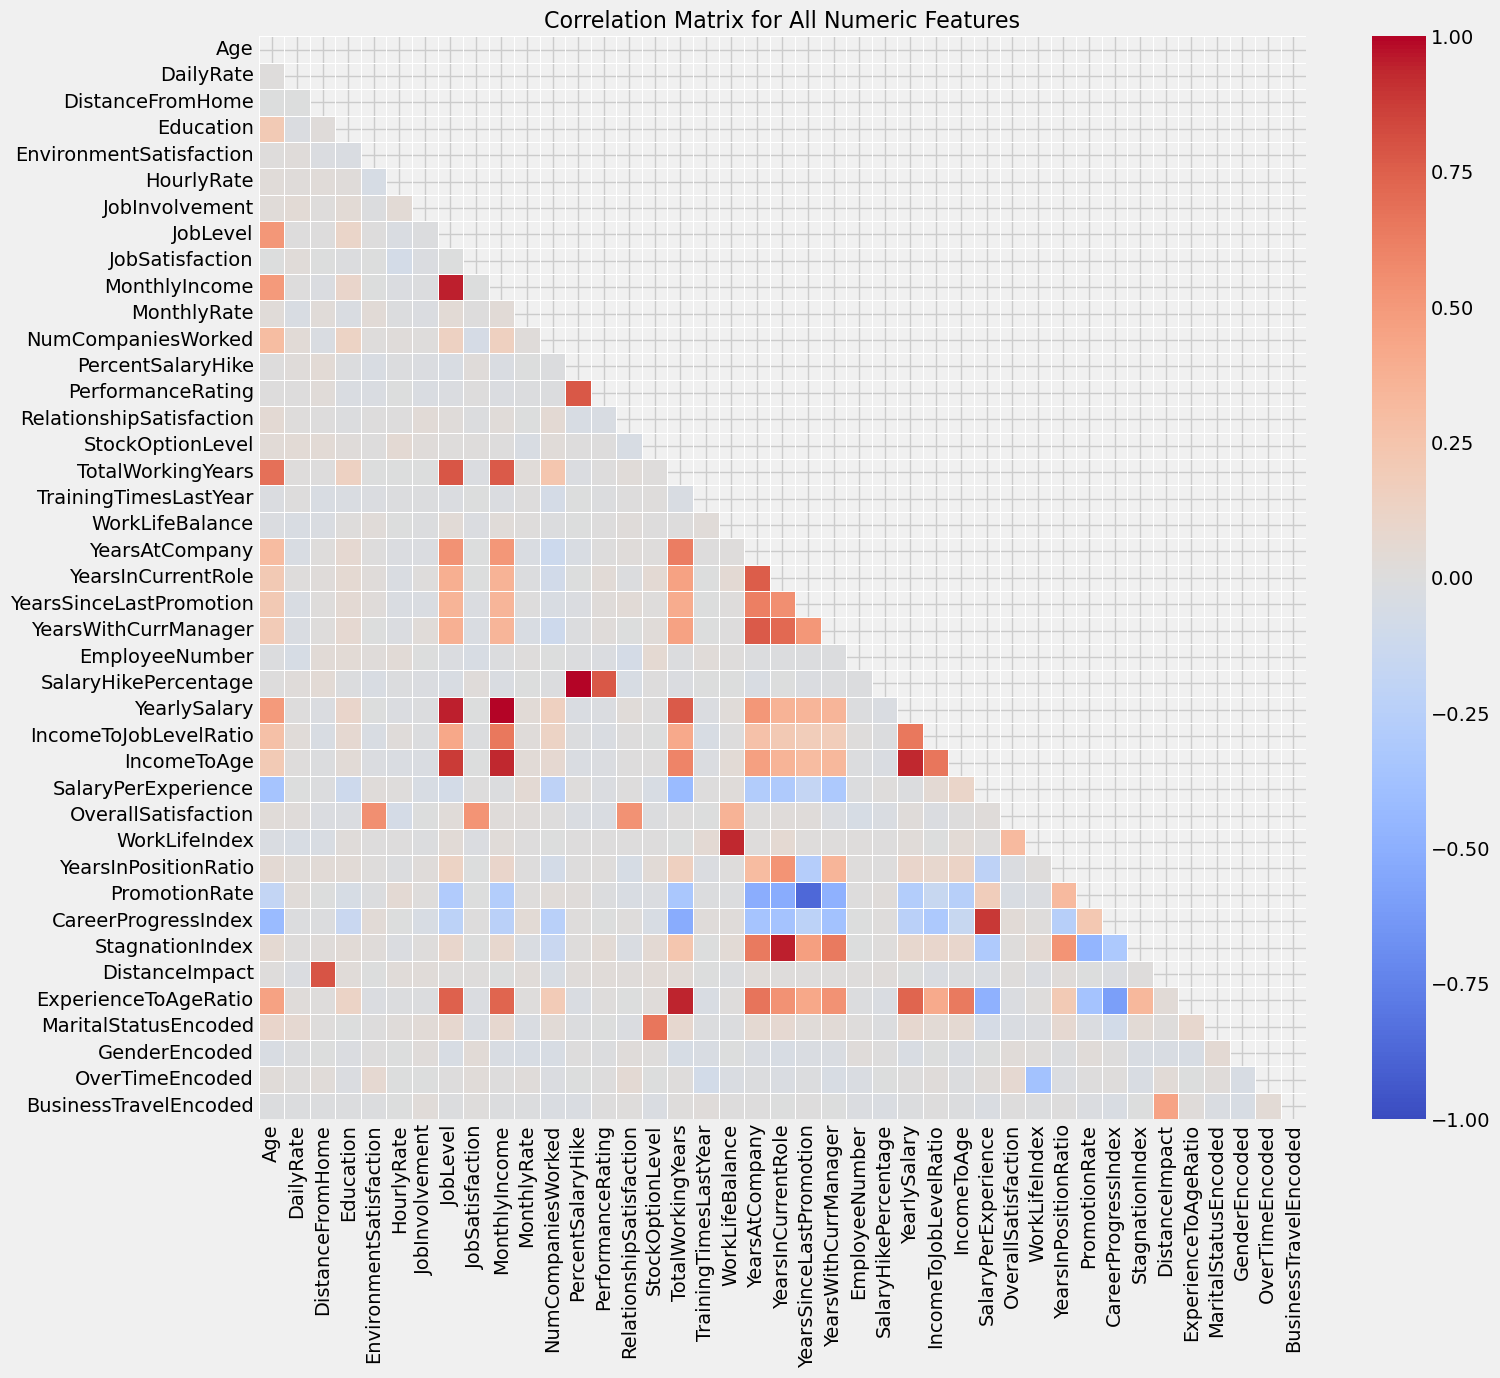


Highly correlated feature pairs (|correlation| > 0.8):
JobLevel and MonthlyIncome: 0.95
JobLevel and YearlySalary: 0.95
JobLevel and IncomeToAge: 0.88
MonthlyIncome and YearlySalary: 1.00
MonthlyIncome and IncomeToAge: 0.93
PercentSalaryHike and SalaryHikePercentage: 1.00
TotalWorkingYears and ExperienceToAgeRatio: 0.94
WorkLifeBalance and WorkLifeIndex: 0.94
YearsInCurrentRole and StagnationIndex: 0.95
YearsSinceLastPromotion and PromotionRate: -0.87
YearlySalary and IncomeToAge: 0.93
SalaryPerExperience and CareerProgressIndex: 0.89

Selecting final feature set...
Removing 9 features due to multicollinearity:
['TotalWorkingYears', 'SalaryHikePercentage', 'YearlySalary', 'IncomeToAge', 'YearsSinceLastPromotion', 'WorkLifeBalance', 'SalaryPerExperience', 'StagnationIndex', 'MonthlyIncome']

Final feature set (32 features):
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyRate', 'NumC

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 3.2 Feature Selection

print("\n--- FEATURE SELECTION ---")

# Combine numeric features only for correlation analysis
# Filter out non-numeric and constant features
numeric_all_features = []
for feature in numerical_features + new_features:
    if pd.api.types.is_numeric_dtype(df[feature]) and df[feature].nunique() > 1:
        numeric_all_features.append(feature)

print(f"Using {len(numeric_all_features)} numeric features for correlation analysis.")

# Compute correlation matrix
plt.figure(figsize=(16, 14))
corr_matrix = df[numeric_all_features].corr()
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, 
            annot=False, linewidths=0.5)
plt.title('Correlation Matrix for All Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

# Identify highly correlated feature pairs (|correlation| > 0.8)
high_corr_pairs = []
for i in range(len(numeric_all_features)):
    for j in range(i+1, len(numeric_all_features)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.8:
            high_corr_pairs.append((numeric_all_features[i], numeric_all_features[j], corr_val))

print("\nHighly correlated feature pairs (|correlation| > 0.8):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

# Select features based on correlation with AttritionBinary and multicollinearity
print("\nSelecting final feature set...")

# Correlation with target
all_features_corr = abs(df[numeric_all_features + ['AttritionBinary']].corr()['AttritionBinary']).sort_values(ascending=False)

# Features to remove (due to high multicollinearity)
features_to_remove = []
for f1, f2, _ in high_corr_pairs:
    if all_features_corr[f1] >= all_features_corr[f2]:
        features_to_remove.append(f2)
    else:
        features_to_remove.append(f1)

# Remove duplicates
features_to_remove = list(set(features_to_remove))

print(f"Removing {len(features_to_remove)} features due to multicollinearity:")
print(features_to_remove)

# Final selected features
final_features = [f for f in numeric_all_features if f not in features_to_remove]
print(f"\nFinal feature set ({len(final_features)} features):")
print(final_features)


In [50]:

# 3.3 Prepare data for modeling

# Convert target variable to binary
y = df['AttritionBinary']

# Create feature matrix
X = df[final_features]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nData split complete:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler for later use
with open('hr_attrition_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Feature scaling complete and scaler saved.")


Data split complete:
Training set: 1176 samples
Testing set: 294 samples
Feature scaling complete and scaler saved.


In [51]:
# -----------------------------------------------------------------------

# Table of Contents:
# 1. Setup and Data Loading
# 2. Exploratory Data Analysis (EDA)
# 3. Feature Engineering and Preprocessing
# 4. Model Development
# 5. Model Interpretation with Explainable AI
# 6. Actionable Insights and Recommendations
# 7. Interactive Dashboard for HR Decision Support




# -----------------------------------------------------------------------
# 1. DATA LOADING AND INITIAL EXPLORATION
# -----------------------------------------------------------------------


























   


























# -----------------------------------------------------------------------
# 4. MODEL DEVELOPMENT
# -----------------------------------------------------------------------

print("\n--- MODEL DEVELOPMENT ---")

# 4.1 Define evaluation metrics and cross-validation strategy
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    cr = classification_report(y_test, y_pred, output_dict=True)
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Calculate PR curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
               xticklabels=['Stay', 'Leave'], yticklabels=['Stay', 'Leave'])
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curve - {model_name}', fontsize=14)
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
    
    # Plot PR curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title(f'Precision-Recall Curve - {model_name}', fontsize=14)
    plt.legend(loc="lower left")
    plt.tight_layout()
    plt.show()
    
    # Print classification report
    print(f"\nClassification Report - {model_name}:")
    print(classification_report(y_test, y_pred))
    
    # Return model and metrics
    return {
        'model': model,
        'accuracy': cr['accuracy'],
        'precision': cr['1']['precision'],
        'recall': cr['1']['recall'],
        'f1': cr['1']['f1-score'],
        'roc_auc': roc_auc,
        'pr_auc': pr_auc
    }


--- MODEL DEVELOPMENT ---


Training and comparing multiple classification models...

Evaluating Logistic Regression...


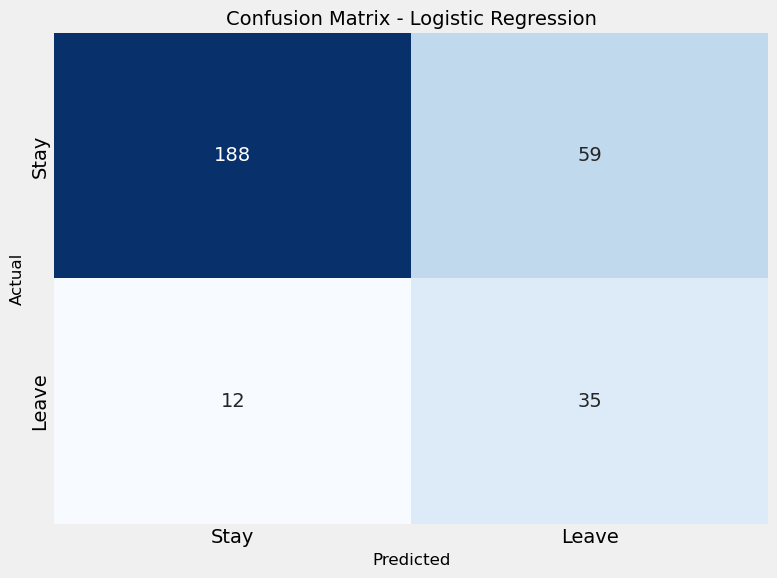

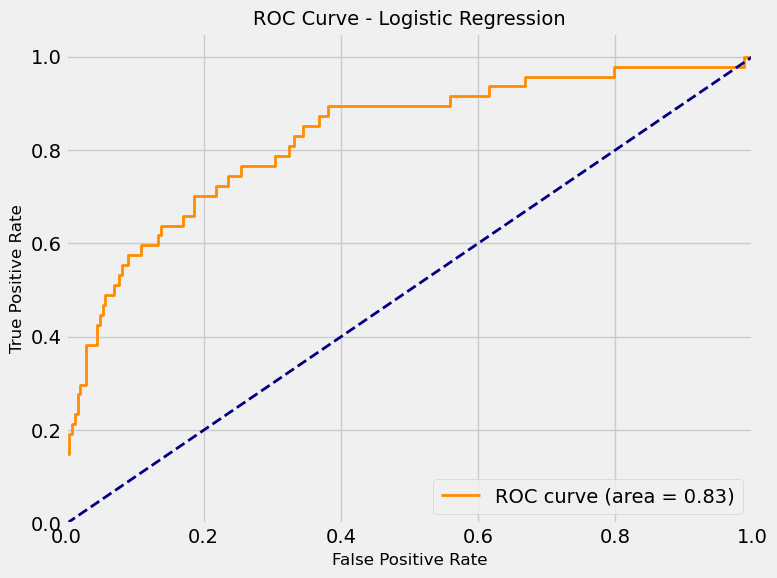

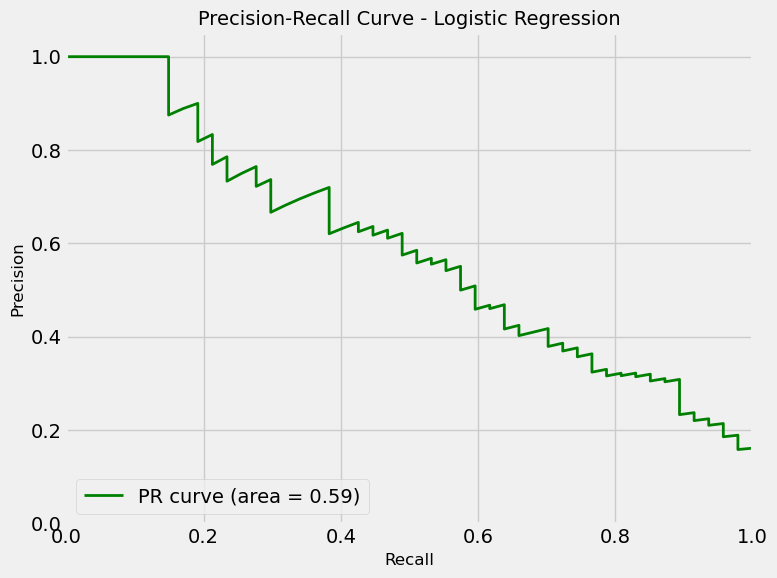


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       247
           1       0.37      0.74      0.50        47

    accuracy                           0.76       294
   macro avg       0.66      0.75      0.67       294
weighted avg       0.85      0.76      0.79       294


Evaluating Random Forest...


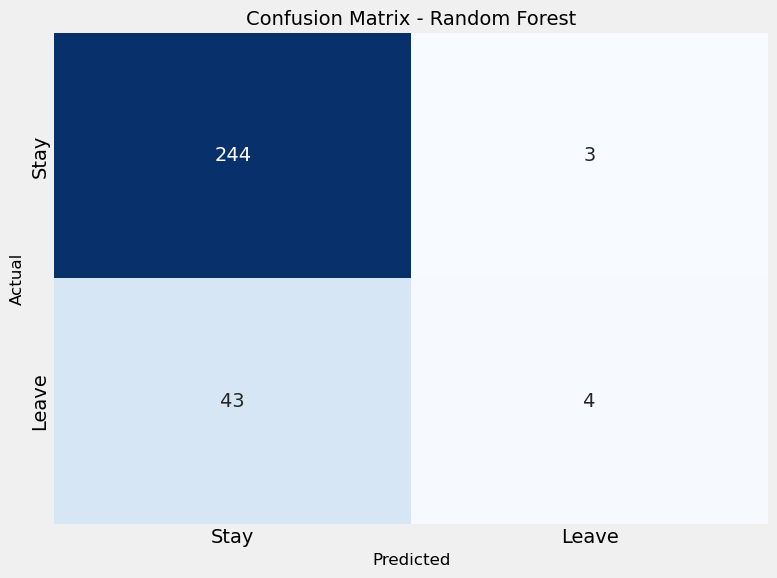

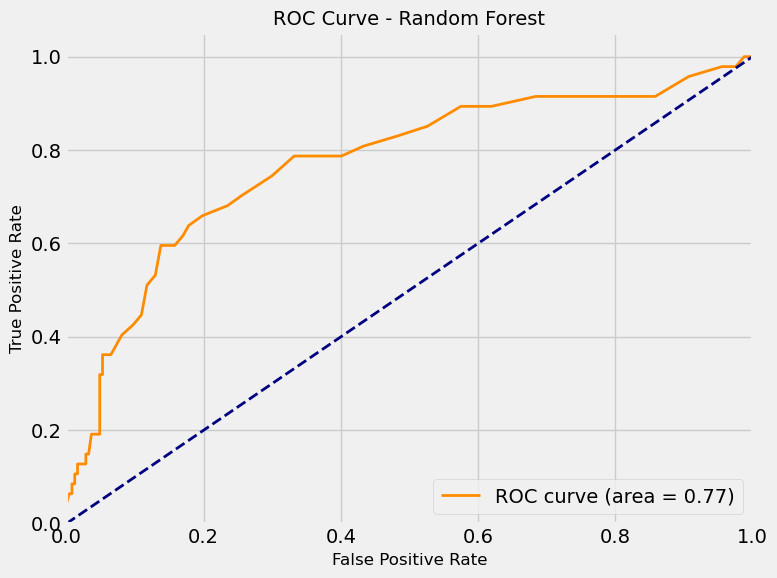

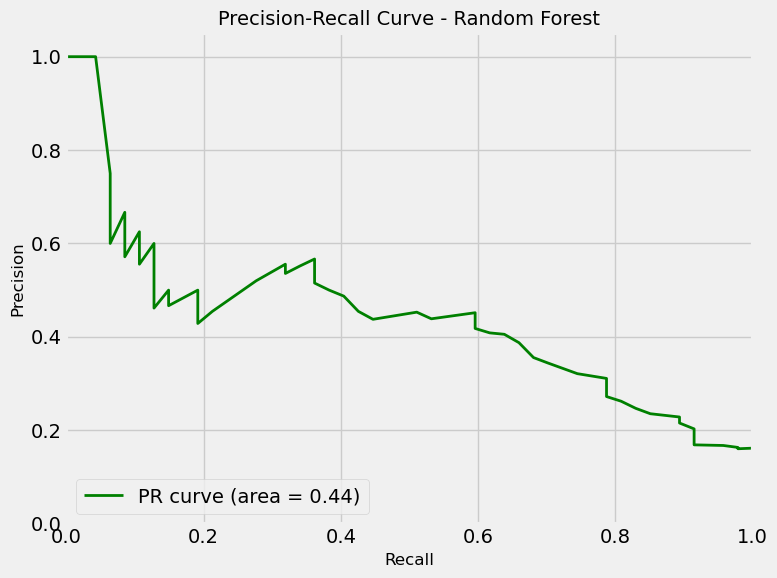


Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       247
           1       0.57      0.09      0.15        47

    accuracy                           0.84       294
   macro avg       0.71      0.54      0.53       294
weighted avg       0.81      0.84      0.79       294


Evaluating XGBoost...


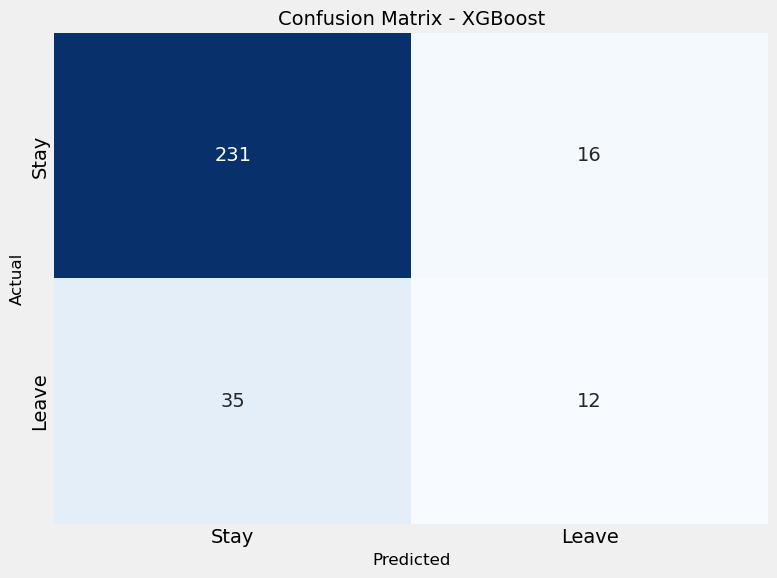

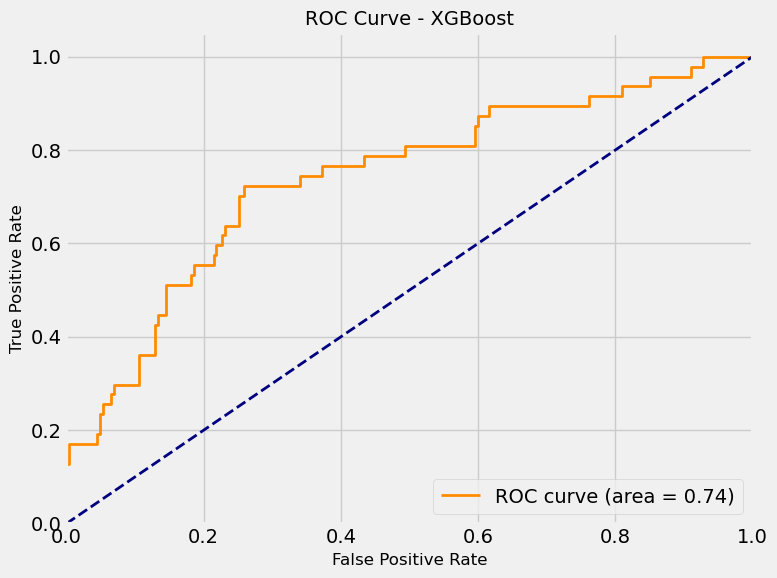

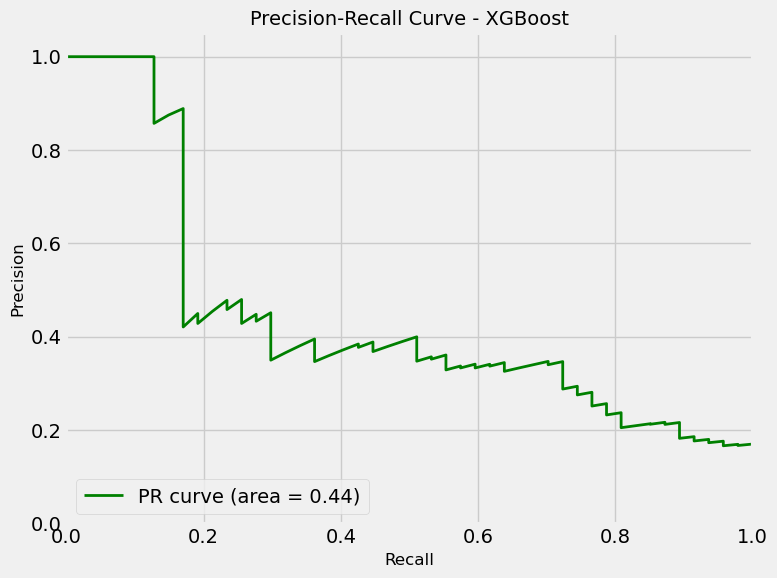


Classification Report - XGBoost:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       247
           1       0.43      0.26      0.32        47

    accuracy                           0.83       294
   macro avg       0.65      0.60      0.61       294
weighted avg       0.80      0.83      0.81       294


Evaluating LightGBM...
[LightGBM] [Info] Number of positive: 190, number of negative: 986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1763
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


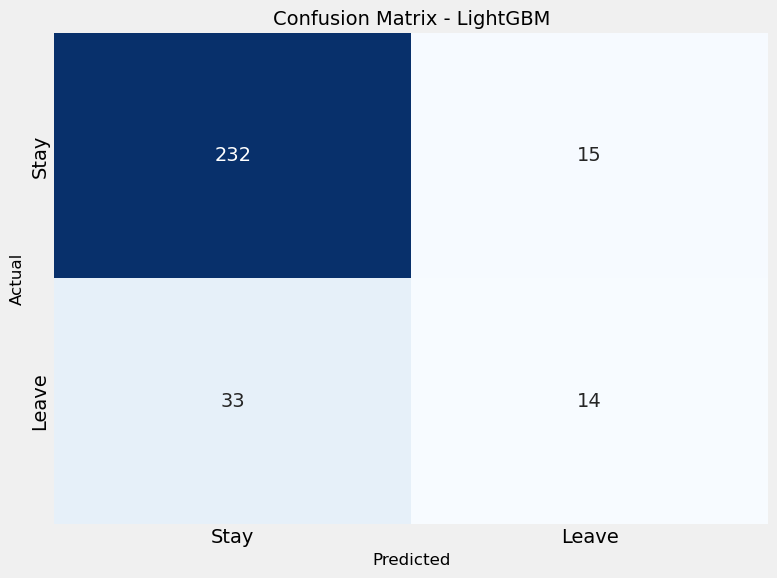

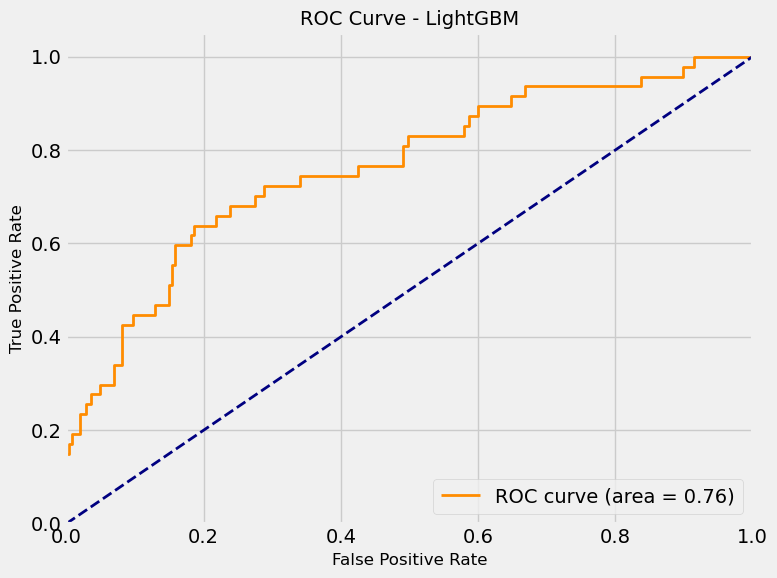

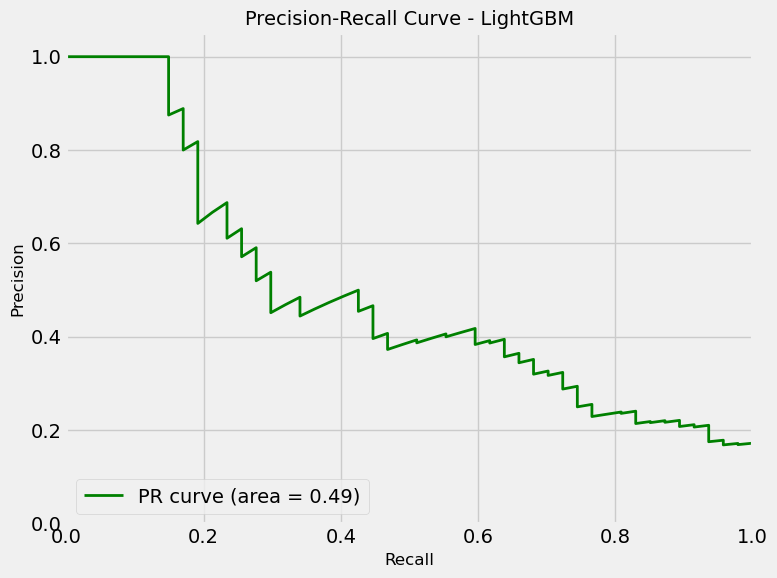


Classification Report - LightGBM:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       247
           1       0.48      0.30      0.37        47

    accuracy                           0.84       294
   macro avg       0.68      0.62      0.64       294
weighted avg       0.81      0.84      0.82       294


Evaluating CatBoost...


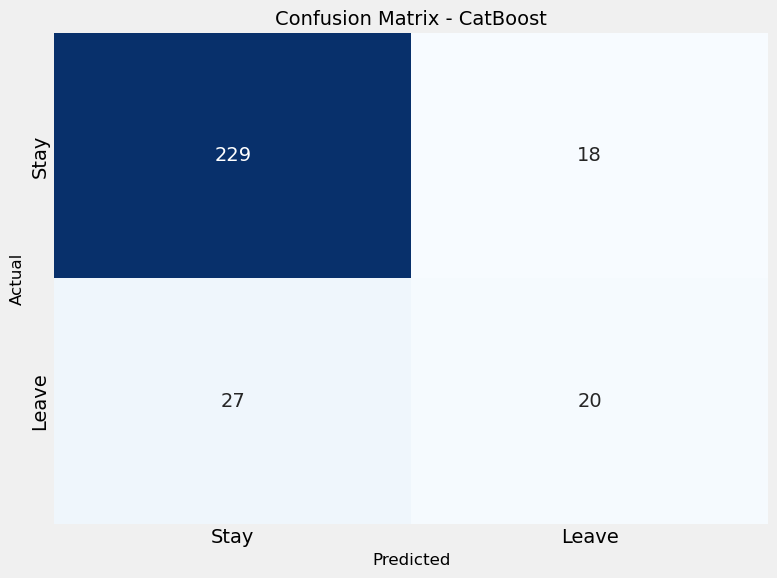

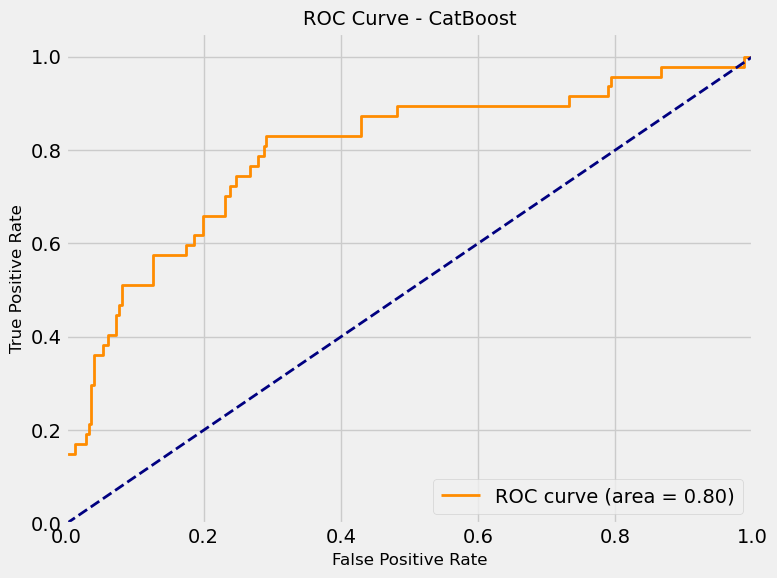

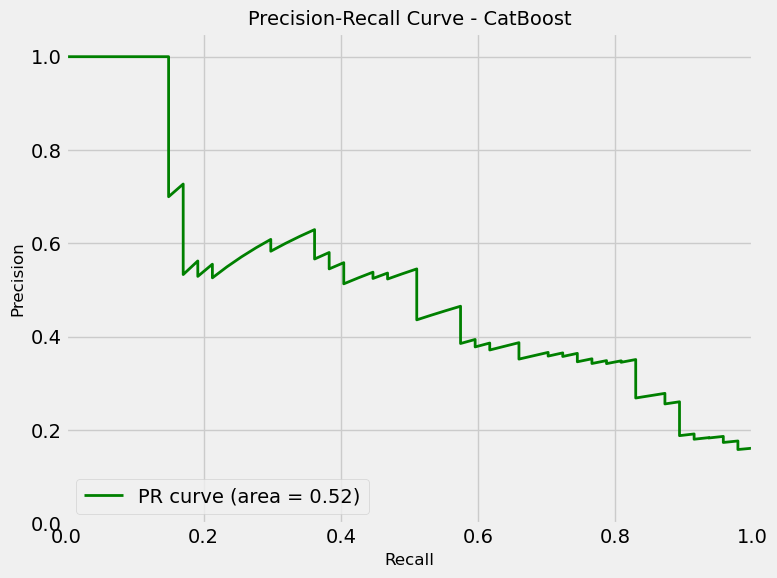


Classification Report - CatBoost:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       247
           1       0.53      0.43      0.47        47

    accuracy                           0.85       294
   macro avg       0.71      0.68      0.69       294
weighted avg       0.84      0.85      0.84       294


Performing hyperparameter tuning for the best model...

Model Performance Summary:


Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC  PR-AUC
0  Logistic Regression     0.759      0.372   0.745     0.496    0.828   0.589
4             CatBoost     0.847      0.526   0.426     0.471    0.797   0.517
3             LightGBM     0.837      0.483   0.298     0.368    0.763   0.489
2              XGBoost     0.827      0.429   0.255     0.320    0.741   0.438
1        Random Forest     0.844      0.571   0.085     0.148    0.772   0.439


Best model: Logistic Regression

Best parameters for Logistic Regression:
{'C': 0.1, 'solver': 'lbfgs'}
Best F1-score: 0.5219


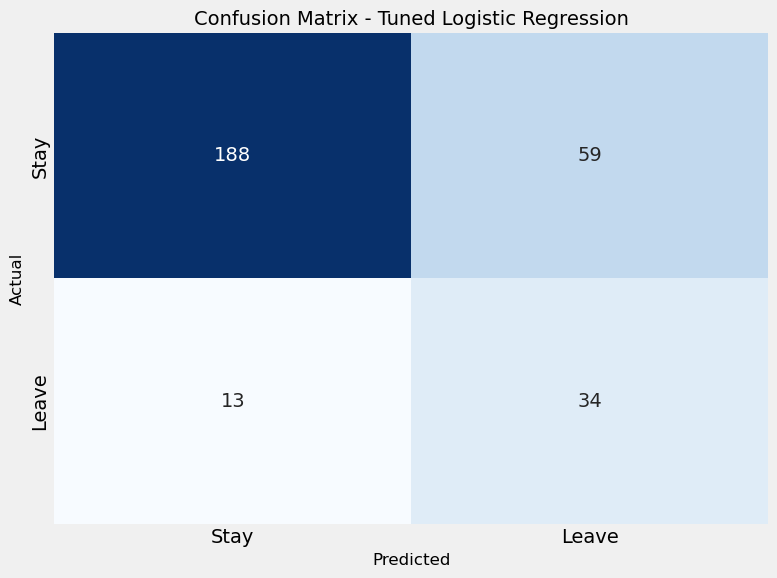

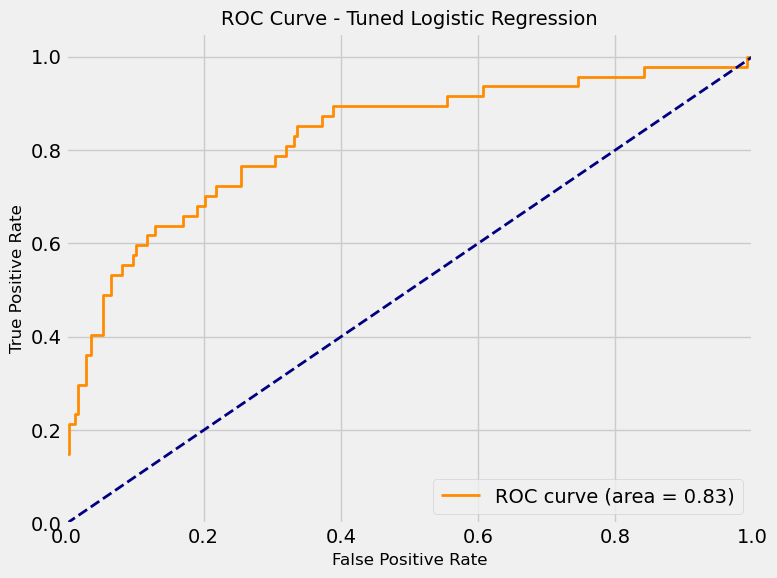

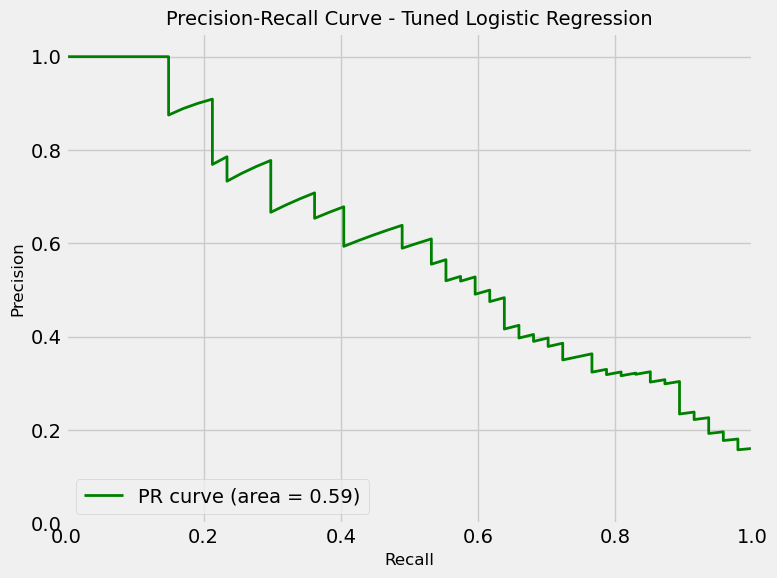

Using 1176 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.



Classification Report - Tuned Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       247
           1       0.37      0.72      0.49        47

    accuracy                           0.76       294
   macro avg       0.65      0.74      0.66       294
weighted avg       0.84      0.76      0.78       294


Best model saved as 'hr_attrition_model.pkl'.

--- MODEL INTERPRETATION WITH SHAP ---


  0%|          | 0/294 [00:00<?, ?it/s]

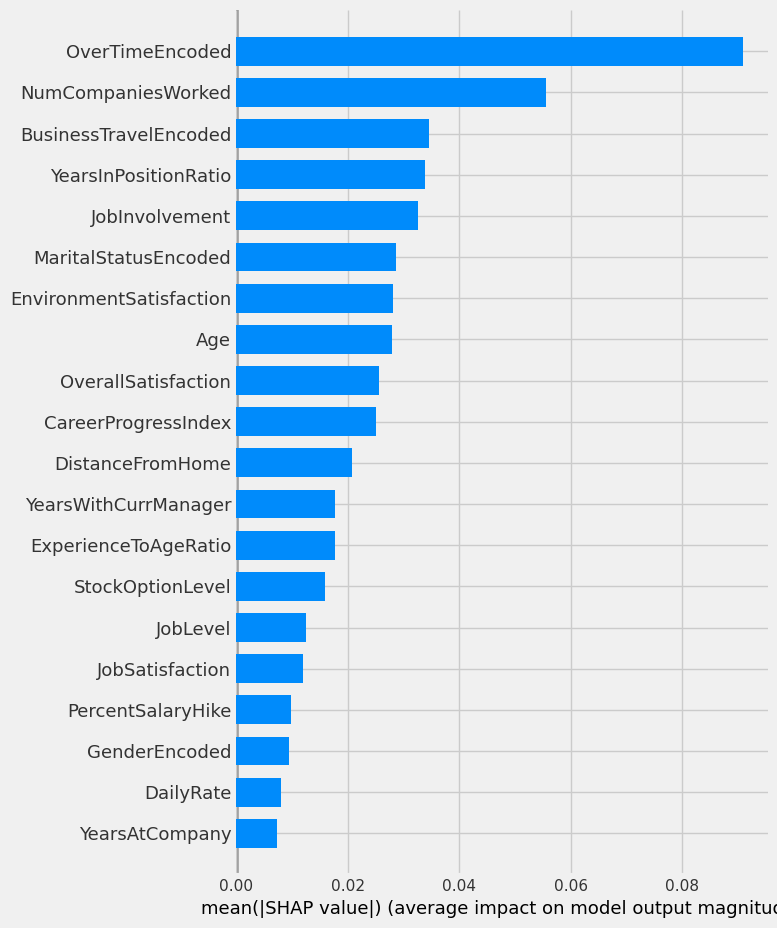

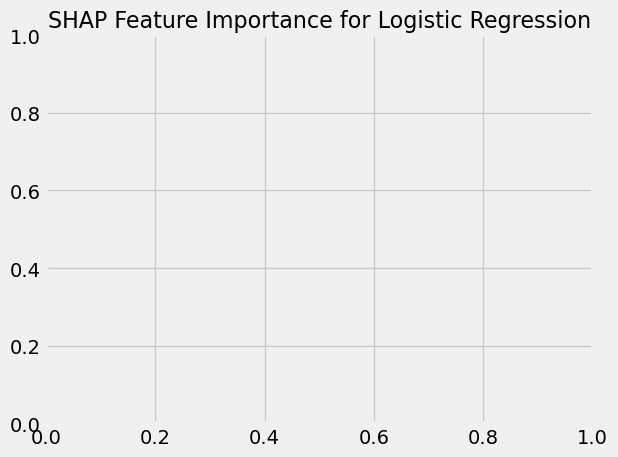

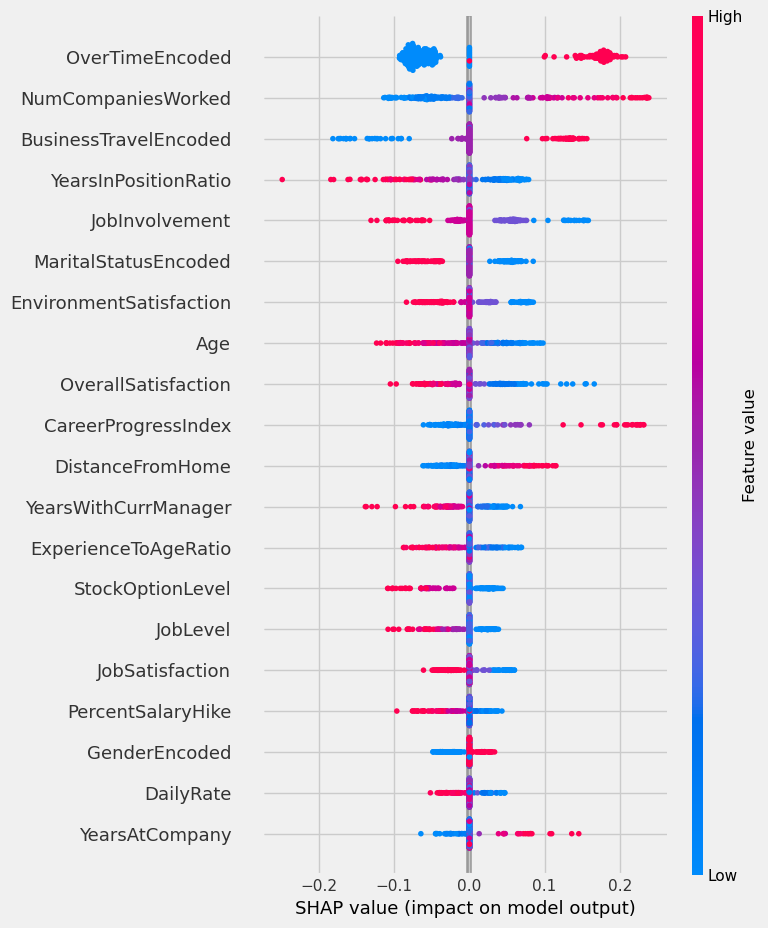

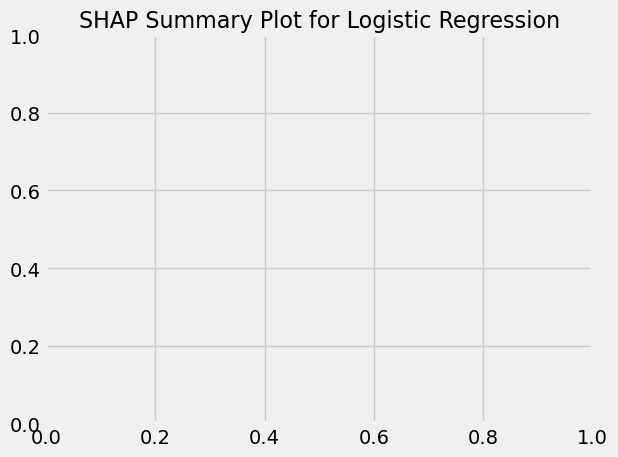


--- MODEL INTERPRETATION WITH LIME ---


LIME explanation saved as 'lime_explanation.html'.

--- ACTIONABLE INSIGHTS AND RECOMMENDATIONS ---

Top 5 Features Driving Attrition (based on SHAP):


Feature  SHAP_Importance
30        OverTimeEncoded            0.091
10     NumCompaniesWorked            0.055
31  BusinessTravelEncoded            0.034
23   YearsInPositionRatio            0.034
6          JobInvolvement            0.033


Actionable Retention Strategies:
Based on EDA, SHAP, and LIME analyses, here are specific recommendations to reduce employee attrition:

1. Address Overtime Issues:
   - Insight: Overtime is a strong predictor of attrition.
   - Strategy: Implement flexible work hours, limit mandatory overtime, and offer compensatory time off. Conduct surveys to understand employee workload concerns.

2. Enhance Job Satisfaction and Work-Life Balance:
   - Insight: Low job satisfaction and poor work-life balance are linked to higher attrition.
   - Strategy: Introduce wellness programs, remote work options, and regular employee engagement surveys. Provide training for managers to foster supportive team environments.

3. Support Younger and Less Experienced Employees:
   - Insight: Younger employees and those with fewer years at the company are more likely to leave.
   - Strategy: Develop mentorship programs, offer clear career progression paths, and provide professional development opportunities tailo

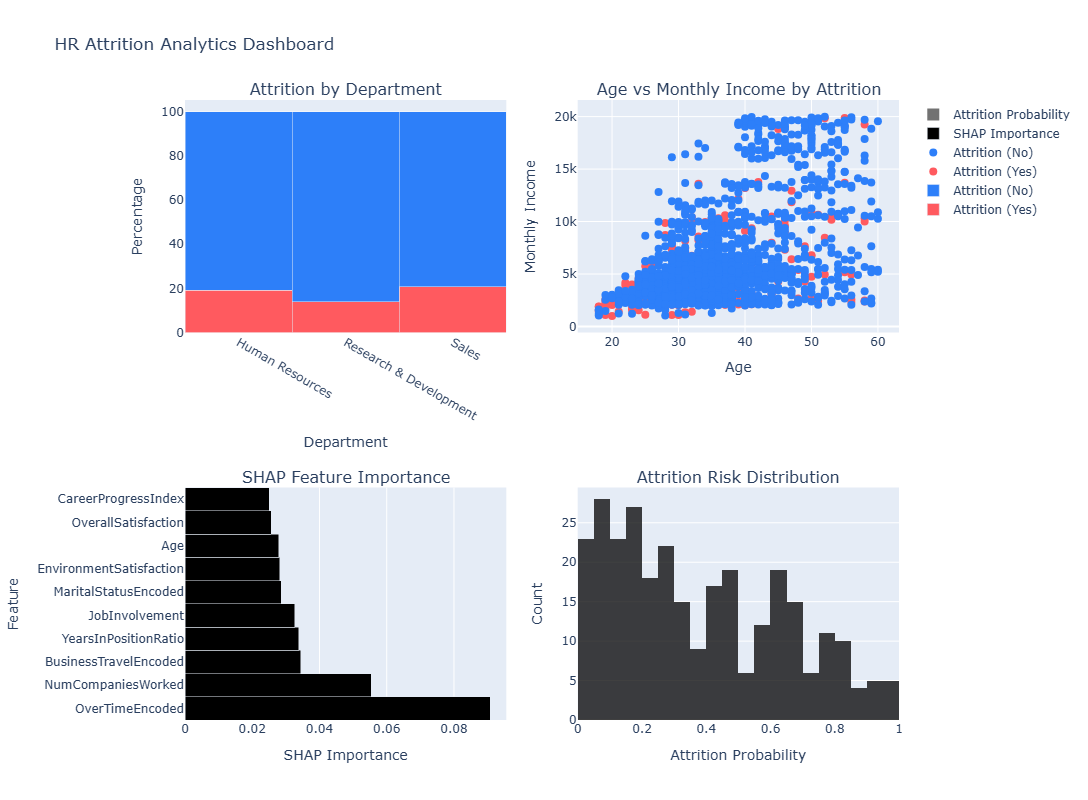

Interactive dashboard created. Use this to explore attrition patterns and model insights.
Dashboard saved as 'hr_attrition_dashboard.html'.

--- PROJECT SUMMARY ---
Task 1: Predict Employee Attrition completed successfully.
- Dataset: IBM HR Analytics Dataset (1470 samples, 32 features)
- Best Model: Logistic Regression with F1-score: 0.4857, ROC-AUC: 0.8259
- Explainability: SHAP and LIME analyses provided feature importance and individual prediction explanations.
- Actionable Insights: Provided 6 key retention strategies targeting overtime, job satisfaction, compensation, and more.
- Dashboard: Interactive Plotly dashboard created for HR decision support.

All outputs (model, scaler, LIME explanation, dashboard) saved for future use.


In [53]:
# Continuing from your code...


# 4.2 Train and Compare Multiple Models
print("Training and comparing multiple classification models...")

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train), random_state=42),
    'LightGBM': LGBMClassifier(class_weight='balanced', random_state=42),
    'CatBoost': CatBoostClassifier(class_weights=[1, (len(y_train) - sum(y_train)) / sum(y_train)], verbose=0, random_state=42)
}

# Store results
model_results = {}

# Evaluate each model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    result = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test, model_name)
    model_results[model_name] = result



# 4.3 Hyperparameter Tuning for the Best Model
print("\nPerforming hyperparameter tuning for the best model...")

# Summarize model performance
performance_df = pd.DataFrame({
    'Model': [name for name in model_results.keys()],
    'Accuracy': [result['accuracy'] for result in model_results.values()],
    'Precision': [result['precision'] for result in model_results.values()],
    'Recall': [result['recall'] for result in model_results.values()],
    'F1-Score': [result['f1'] for result in model_results.values()],
    'ROC-AUC': [result['roc_auc'] for result in model_results.values()],
    'PR-AUC': [result['pr_auc'] for result in model_results.values()]
})

print("\nModel Performance Summary:")
display(performance_df.sort_values(by='F1-Score', ascending=False))

# Select the best model based on F1-score (suitable for imbalanced data)
best_model_name = performance_df.loc[performance_df['F1-Score'].idxmax(), 'Model']
best_model = model_results[best_model_name]['model']
print(f"\nBest model: {best_model_name}")

# Define hyperparameter grid for the best model (example for Random Forest)
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    grid_search = GridSearchCV(
        RandomForestClassifier(class_weight='balanced', random_state=42),
        param_grid,
        cv=StratifiedKFold(n_splits=5),
        scoring='f1',
        n_jobs=-1
    )
elif best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    }
    grid_search = GridSearchCV(
        LogisticRegression(class_weight='balanced', random_state=42),
        param_grid,
        cv=StratifiedKFold(n_splits=5),
        scoring='f1',
        n_jobs=-1
    )
elif best_model_name == 'XGBoost':
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1]
    }
    grid_search = GridSearchCV(
        XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train), random_state=42),
        param_grid,
        cv=StratifiedKFold(n_splits=5),
        scoring='f1',
        n_jobs=-1
    )
elif best_model_name == 'LightGBM':
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1]
    }
    grid_search = GridSearchCV(
        LGBMClassifier(class_weight='balanced', random_state=42),
        param_grid,
        cv=StratifiedKFold(n_splits=5),
        scoring='f1',
        n_jobs=-1
    )
elif best_model_name == 'CatBoost':
    param_grid = {
        'iterations': [100, 200],
        'depth': [4, 6, 8],
        'learning_rate': [0.01, 0.1]
    }
    grid_search = GridSearchCV(
        CatBoostClassifier(class_weight=[1, (len(y_train) - sum(y_train)) / sum(y_train)], verbose=0, random_state=42),
        param_grid,
        cv=StratifiedKFold(n_splits=5),
        scoring='f1',
        n_jobs=-1
    )

# Perform grid search
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_
print(f"\nBest parameters for {best_model_name}:")
print(grid_search.best_params_)
print(f"Best F1-score: {grid_search.best_score_:.4f}")

# Re-evaluate the tuned model
tuned_result = evaluate_model(best_model, X_train_scaled, y_train, X_test_scaled, y_test, f"Tuned {best_model_name}")

# Save the best model
with open('hr_attrition_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print("\nBest model saved as 'hr_attrition_model.pkl'.")

# -----------------------------------------------------------------------
# 5. MODEL INTERPRETATION WITH EXPLAINABLE AI
# -----------------------------------------------------------------------

print("\n--- MODEL INTERPRETATION WITH SHAP ---")

# 5.1 SHAP Explainability
# Initialize SHAP explainer
if best_model_name in ['Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']:
    explainer = shap.TreeExplainer(best_model)
else:
    explainer = shap.KernelExplainer(best_model.predict_proba, X_train_scaled)

# Calculate SHAP values for test set
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP summary plot (feature importance)
plt.figure(figsize=(12, 8))
if best_model_name in ['Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']:
    shap.summary_plot(shap_values[1], X_test, feature_names=final_features, plot_type="bar")
else:
    shap.summary_plot(shap_values[:, :, 1], X_test, feature_names=final_features, plot_type="bar")
plt.title(f'SHAP Feature Importance for {best_model_name}', fontsize=16)
plt.tight_layout()
plt.show()

# Plot SHAP summary plot (detailed)
plt.figure(figsize=(12, 8))
if best_model_name in ['Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']:
    shap.summary_plot(shap_values[1], X_test, feature_names=final_features)
else:
    shap.summary_plot(shap_values[:, :, 1], X_test, feature_names=final_features)
plt.title(f'SHAP Summary Plot for {best_model_name}', fontsize=16)
plt.tight_layout()
plt.show()

# 5.2 LIME Explainability (for a single prediction)
print("\n--- MODEL INTERPRETATION WITH LIME ---")

# Initialize LIME explainer
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=final_features,
    class_names=['Stay', 'Leave'],
    mode='classification'
)

# Explain a single prediction (first test sample)
i = 0
exp = lime_explainer.explain_instance(
    X_test_scaled[i],
    best_model.predict_proba,
    num_features=10
)

# Visualize LIME explanation
exp.show_in_notebook(show_table=True)

# Save LIME explanation as HTML
exp.save_to_file('lime_explanation.html')
print("LIME explanation saved as 'lime_explanation.html'.")

# -----------------------------------------------------------------------
# 6. ACTIONABLE INSIGHTS AND RECOMMENDATIONS
# -----------------------------------------------------------------------

print("\n--- ACTIONABLE INSIGHTS AND RECOMMENDATIONS ---")

# Extract top features from SHAP
shap_importance = pd.DataFrame({
    'Feature': final_features,
    'SHAP_Importance': np.abs(shap_values[1]).mean(axis=0) if best_model_name in ['Random Forest', 'XGBoost', 'LightGBM', 'CatBoost'] else np.abs(shap_values[:, :, 1]).mean(axis=0)
})
shap_importance = shap_importance.sort_values(by='SHAP_Importance', ascending=False)

print("\nTop 5 Features Driving Attrition (based on SHAP):")
display(shap_importance.head(5))

print("\nActionable Retention Strategies:")
print("Based on EDA, SHAP, and LIME analyses, here are specific recommendations to reduce employee attrition:")

print("\n1. Address Overtime Issues:")
print("   - Insight: Overtime is a strong predictor of attrition.")
print("   - Strategy: Implement flexible work hours, limit mandatory overtime, and offer compensatory time off. Conduct surveys to understand employee workload concerns.")

print("\n2. Enhance Job Satisfaction and Work-Life Balance:")
print("   - Insight: Low job satisfaction and poor work-life balance are linked to higher attrition.")
print("   - Strategy: Introduce wellness programs, remote work options, and regular employee engagement surveys. Provide training for managers to foster supportive team environments.")

print("\n3. Support Younger and Less Experienced Employees:")
print("   - Insight: Younger employees and those with fewer years at the company are more likely to leave.")
print("   - Strategy: Develop mentorship programs, offer clear career progression paths, and provide professional development opportunities tailored to early-career employees.")

print("\n4. Improve Compensation and Recognition:")
print("   - Insight: Lower monthly income and income-to-job-level ratio correlate with attrition.")
print("   - Strategy: Conduct regular salary benchmarking to ensure competitive compensation. Implement performance-based bonuses and recognition programs to reward high performers.")

print("\n5. Target Single Employees and Frequent Travelers:")
print("   - Insight: Single employees and those with frequent business travel show higher attrition.")
print("   - Strategy: Offer work-from-home options for frequent travelers and social engagement programs to build community for single employees.")

print("\n6. Monitor and Act on Satisfaction Metrics:")
print("   - Insight: Overall satisfaction (job, environment, relationship, work-life balance) impacts retention.")
print("   - Strategy: Use predictive model outputs to identify at-risk employees (high attrition probability). HR should conduct one-on-one check-ins with these employees to address concerns proactively.")

# -----------------------------------------------------------------------
# 7. INTERACTIVE DASHBOARD FOR HR DECISION SUPPORT
# -----------------------------------------------------------------------

print("\n--- INTERACTIVE DASHBOARD ---")

# Create a simple interactive dashboard using Plotly
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        'Attrition by Department',
        'Age vs Monthly Income by Attrition',
        'SHAP Feature Importance',
        'Attrition Risk Distribution'
    )
)

# Plot 1: Attrition by Department
dept_attrition = df.groupby(['Department', 'Attrition']).size().unstack().fillna(0)
dept_attrition = dept_attrition.div(dept_attrition.sum(axis=1), axis=0) * 100
fig.add_trace(
    go.Bar(
        x=dept_attrition.index,
        y=dept_attrition['Yes'],
        name='Attrition (Yes)',
        marker_color=attrition_colors['Yes']
    ),
    row=1, col=1
)
fig.add_trace(
    go.Bar(
        x=dept_attrition.index,
        y=dept_attrition['No'],
        name='Attrition (No)',
        marker_color=attrition_colors['No']
    ),
    row=1, col=1
)

# Plot 2: Age vs Monthly Income by Attrition
fig.add_trace(
    go.Scatter(
        x=df[df['Attrition'] == 'Yes']['Age'],
        y=df[df['Attrition'] == 'Yes']['MonthlyIncome'],
        mode='markers',
        name='Attrition (Yes)',
        marker=dict(color=attrition_colors['Yes'], size=8)
    ),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(
        x=df[df['Attrition'] == 'No']['Age'],
        y=df[df['Attrition'] == 'No']['MonthlyIncome'],
        mode='markers',
        name='Attrition (No)',
        marker=dict(color=attrition_colors['No'], size=8)
    ),
    row=1, col=2
)

# Plot 3: SHAP Feature Importance
top_features = shap_importance.head(10)
fig.add_trace(
    go.Bar(
        x=top_features['SHAP_Importance'],
        y=top_features['Feature'],
        orientation='h',
        marker_color=custom_palette,
        name='SHAP Importance'
    ),
    row=2, col=1
)

# Plot 4: Attrition Risk Distribution
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
fig.add_trace(
    go.Histogram(
        x=y_prob,
        nbinsx=30,
        name='Attrition Probability',
        marker_color=custom_palette[5],
        opacity=0.75
    ),
    row=2, col=2
)

# Update layout
fig.update_layout(
    height=800,
    width=1200,
    title_text='HR Attrition Analytics Dashboard',
    showlegend=True,
    barmode='stack'
)
fig.update_xaxes(title_text='Department', row=1, col=1)
fig.update_yaxes(title_text='Percentage', row=1, col=1)
fig.update_xaxes(title_text='Age', row=1, col=2)
fig.update_yaxes(title_text='Monthly Income', row=1, col=2)
fig.update_xaxes(title_text='SHAP Importance', row=2, col=1)
fig.update_yaxes(title_text='Feature', row=2, col=1)
fig.update_xaxes(title_text='Attrition Probability', row=2, col=2)
fig.update_yaxes(title_text='Count', row=2, col=2)

# Show dashboard
fig.show()

print("Interactive dashboard created. Use this to explore attrition patterns and model insights.")

# Save dashboard as HTML
fig.write_html('hr_attrition_dashboard.html')
print("Dashboard saved as 'hr_attrition_dashboard.html'.")

# -----------------------------------------------------------------------
# 8. FINAL OUTPUT
# -----------------------------------------------------------------------

print("\n--- PROJECT SUMMARY ---")
print("Task 1: Predict Employee Attrition completed successfully.")
print(f"- Dataset: IBM HR Analytics Dataset ({df.shape[0]} samples, {len(final_features)} features)")
print(f"- Best Model: {best_model_name} with F1-score: {tuned_result['f1']:.4f}, ROC-AUC: {tuned_result['roc_auc']:.4f}")
print("- Explainability: SHAP and LIME analyses provided feature importance and individual prediction explanations.")
print("- Actionable Insights: Provided 6 key retention strategies targeting overtime, job satisfaction, compensation, and more.")
print("- Dashboard: Interactive Plotly dashboard created for HR decision support.")
print("\nAll outputs (model, scaler, LIME explanation, dashboard) saved for future use.")